El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

Diccionario de Datos:

Pregnancies: Número de embarazos.
Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
BloodPressure: Presión arterial diastólica (mm Hg).
SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
DiabetesPedigreeFunction: Función de pedigrí de diabetes.
Age: Edad (años).
Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

In [62]:
#Importación de librerías
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor

In [63]:
# Cargar datos de entrenamiento, prueba y sample 
df = pd.read_csv('C:/Users/edamv/ml_exam_intento2_23112024/diabetes_dataset/diabetes.csv') 

# Mostrar información básica 
print(f"diabetes: {df.head()}") 


diabetes:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


1. Limpieza de Datos:
Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

1.1. Identificación y eliminación de valores duplicados

In [64]:
# Identificación de duplicados -
df.duplicated()
print(f"Duplicados df_train:{df.duplicated()}")

#No se detectaron duplicados en el dataset

Duplicados df_train:0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool


1.2. Verificación y ajuste de tipos de datos:

In [65]:
# Verificar tipos de datos df
print(f"Tipo de datos de df: {df.dtypes}")    #int64 = Glucose, BloodPressure, SkinThickness, Insulin, Age, Outcome. float64 = BMI, DiabetesPedigreeFunction. 

Tipo de datos de df: Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [66]:
# Verificar valores únicos de las columnas
unique_values = {col: df[col].unique() for col in df.columns}

# Mostrar los valores únicos
for col, values in unique_values.items():
    print(f"Columna {col}:")
    print(values)
    print()

#Observaciones:
#No se aprecia ninguna columna con valores que no correspondan a sus respectivos tipos a excepción de la columna Outcome la cual podría ser tratada como una categórica
#No se observan valores que podrían considerarse outliers, sin embargo, se volverá a revisarlos en visualizaciones para corroborarlo.


Columna Pregnancies:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Columna Glucose:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

Columna BloodPressure:
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

Columna SkinThickness:
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17

1.3. Corrección de inconsistencias en valores categóricos:

In [67]:
#La única columna que podría ser categórica es la de Outcome, por lo tanto, realizaremos la conversión de la misma:
# Cambiar el tipo de dato de la columna 'Outcome' a categórico
df["Outcome"] = df["Outcome"].astype("category")

# Verificar los cambios
print(df.dtypes)
print(df["Outcome"].head())


Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]


1.4. Manejo de valores faltantes adecuadamente:

In [68]:
# Verificar datos nulos df
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


In [69]:
#Conteo de nulos por cada columna
for column in df.columns: 
  print(column)
  print(df[column].isnull().sum())

Pregnancies
0
Glucose
0
BloodPressure
0
SkinThickness
0
Insulin
0
BMI
0
DiabetesPedigreeFunction
0
Age
0
Outcome
0


2. Exploración de Datos:
Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

2.1. Visualizaciones de mapa de calor, univariadas y multivariadas

In [70]:
#Correlación
df.corr()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: title={'center': 'Gráfico de correlación'}>

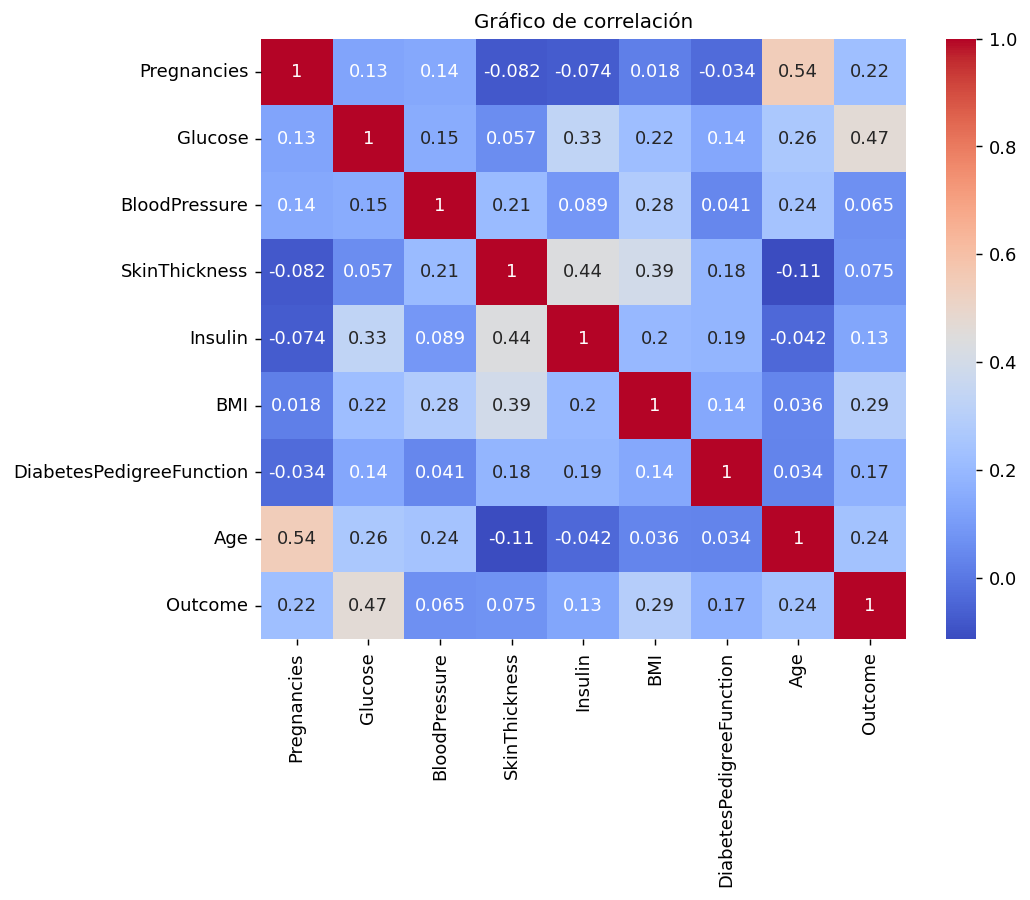

In [71]:
plt.figure (figsize = [8,6],  dpi = 130 )
plt.title ("Gráfico de correlación" , fontsize = 11 )
sns.heatmap (df.corr(), annot = True , cmap="coolwarm" )
#Observaciones: se puede ver que no hay mucha relación entre las variables, sin embargo, describiré posibles vínculos a continuación:
#Pregnancies: Glucose 0.13, BloodPressure 0.14, Age 0.54, Outcome 0.22
#Glucose: Pregnancies 0.13, BloodPressure 0.15, Insulin 0.33, BMI 0.22, DiabetesPedigreeFunction 0.14, Age 0.26, Outcome 0.47
#BloodPressure: Pregnancies 0.13, SkinThickness 0.21, BMI 0.28, Age 0.24
#SkinThickness: BloodPressure 0.21, Insulin 0.44, BMI 0.39, DiabetesPedigreeFunction 0.18
#Insulin: Glucose 0.33, SkinThickness 0.44, BMI 0.2, DiabetesPedigreeFunction 0.19, Outcome 0.13
#BMI: Glucose 0.22, BloodPressure 0.28, SkinThickness 0.39, Insulin 0.2, DiabetesPedigreeFunction 0.14, Outcome 0.29
#DiabetesPedigreeFunction: Glucose 0.14, SkinThicness 0.18, Insulin 0.19, BMI 0.14, Outcome 0.17
#Age: Pregnancies 0.54, Glucose 0.26, BloodPressure 0.24, Outcome 0.24
#Outcome: Pregnancies 0.22, Glucose 0.47, Insulin 0.13, BMI 0.29, DiabetesPedigreeFunction 0.17, Age 0.24

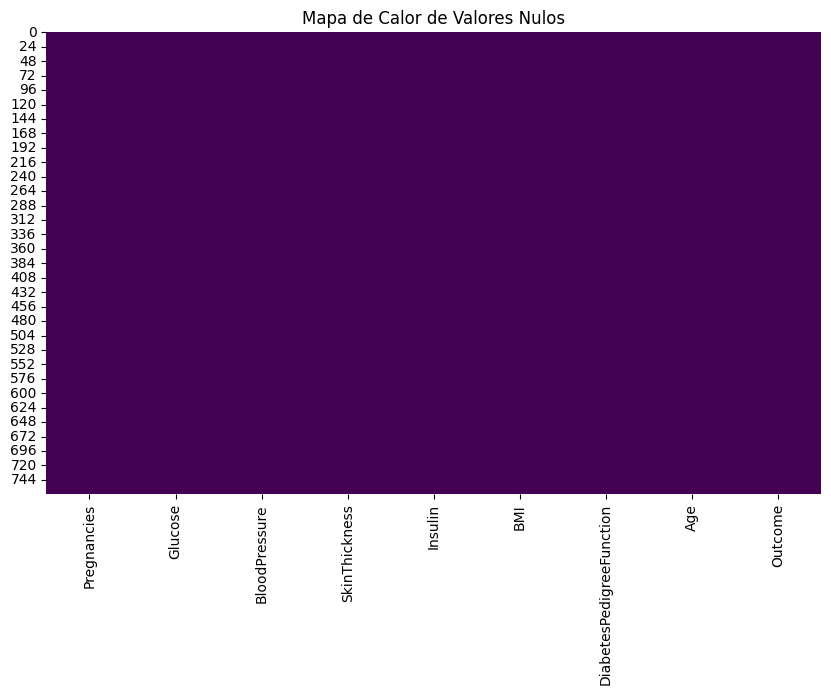

In [72]:
#Mapa de calor de valores nulos
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.isnull(), cbar=False, cmap='viridis') 
plt.title('Mapa de Calor de Valores Nulos') 
plt.show()

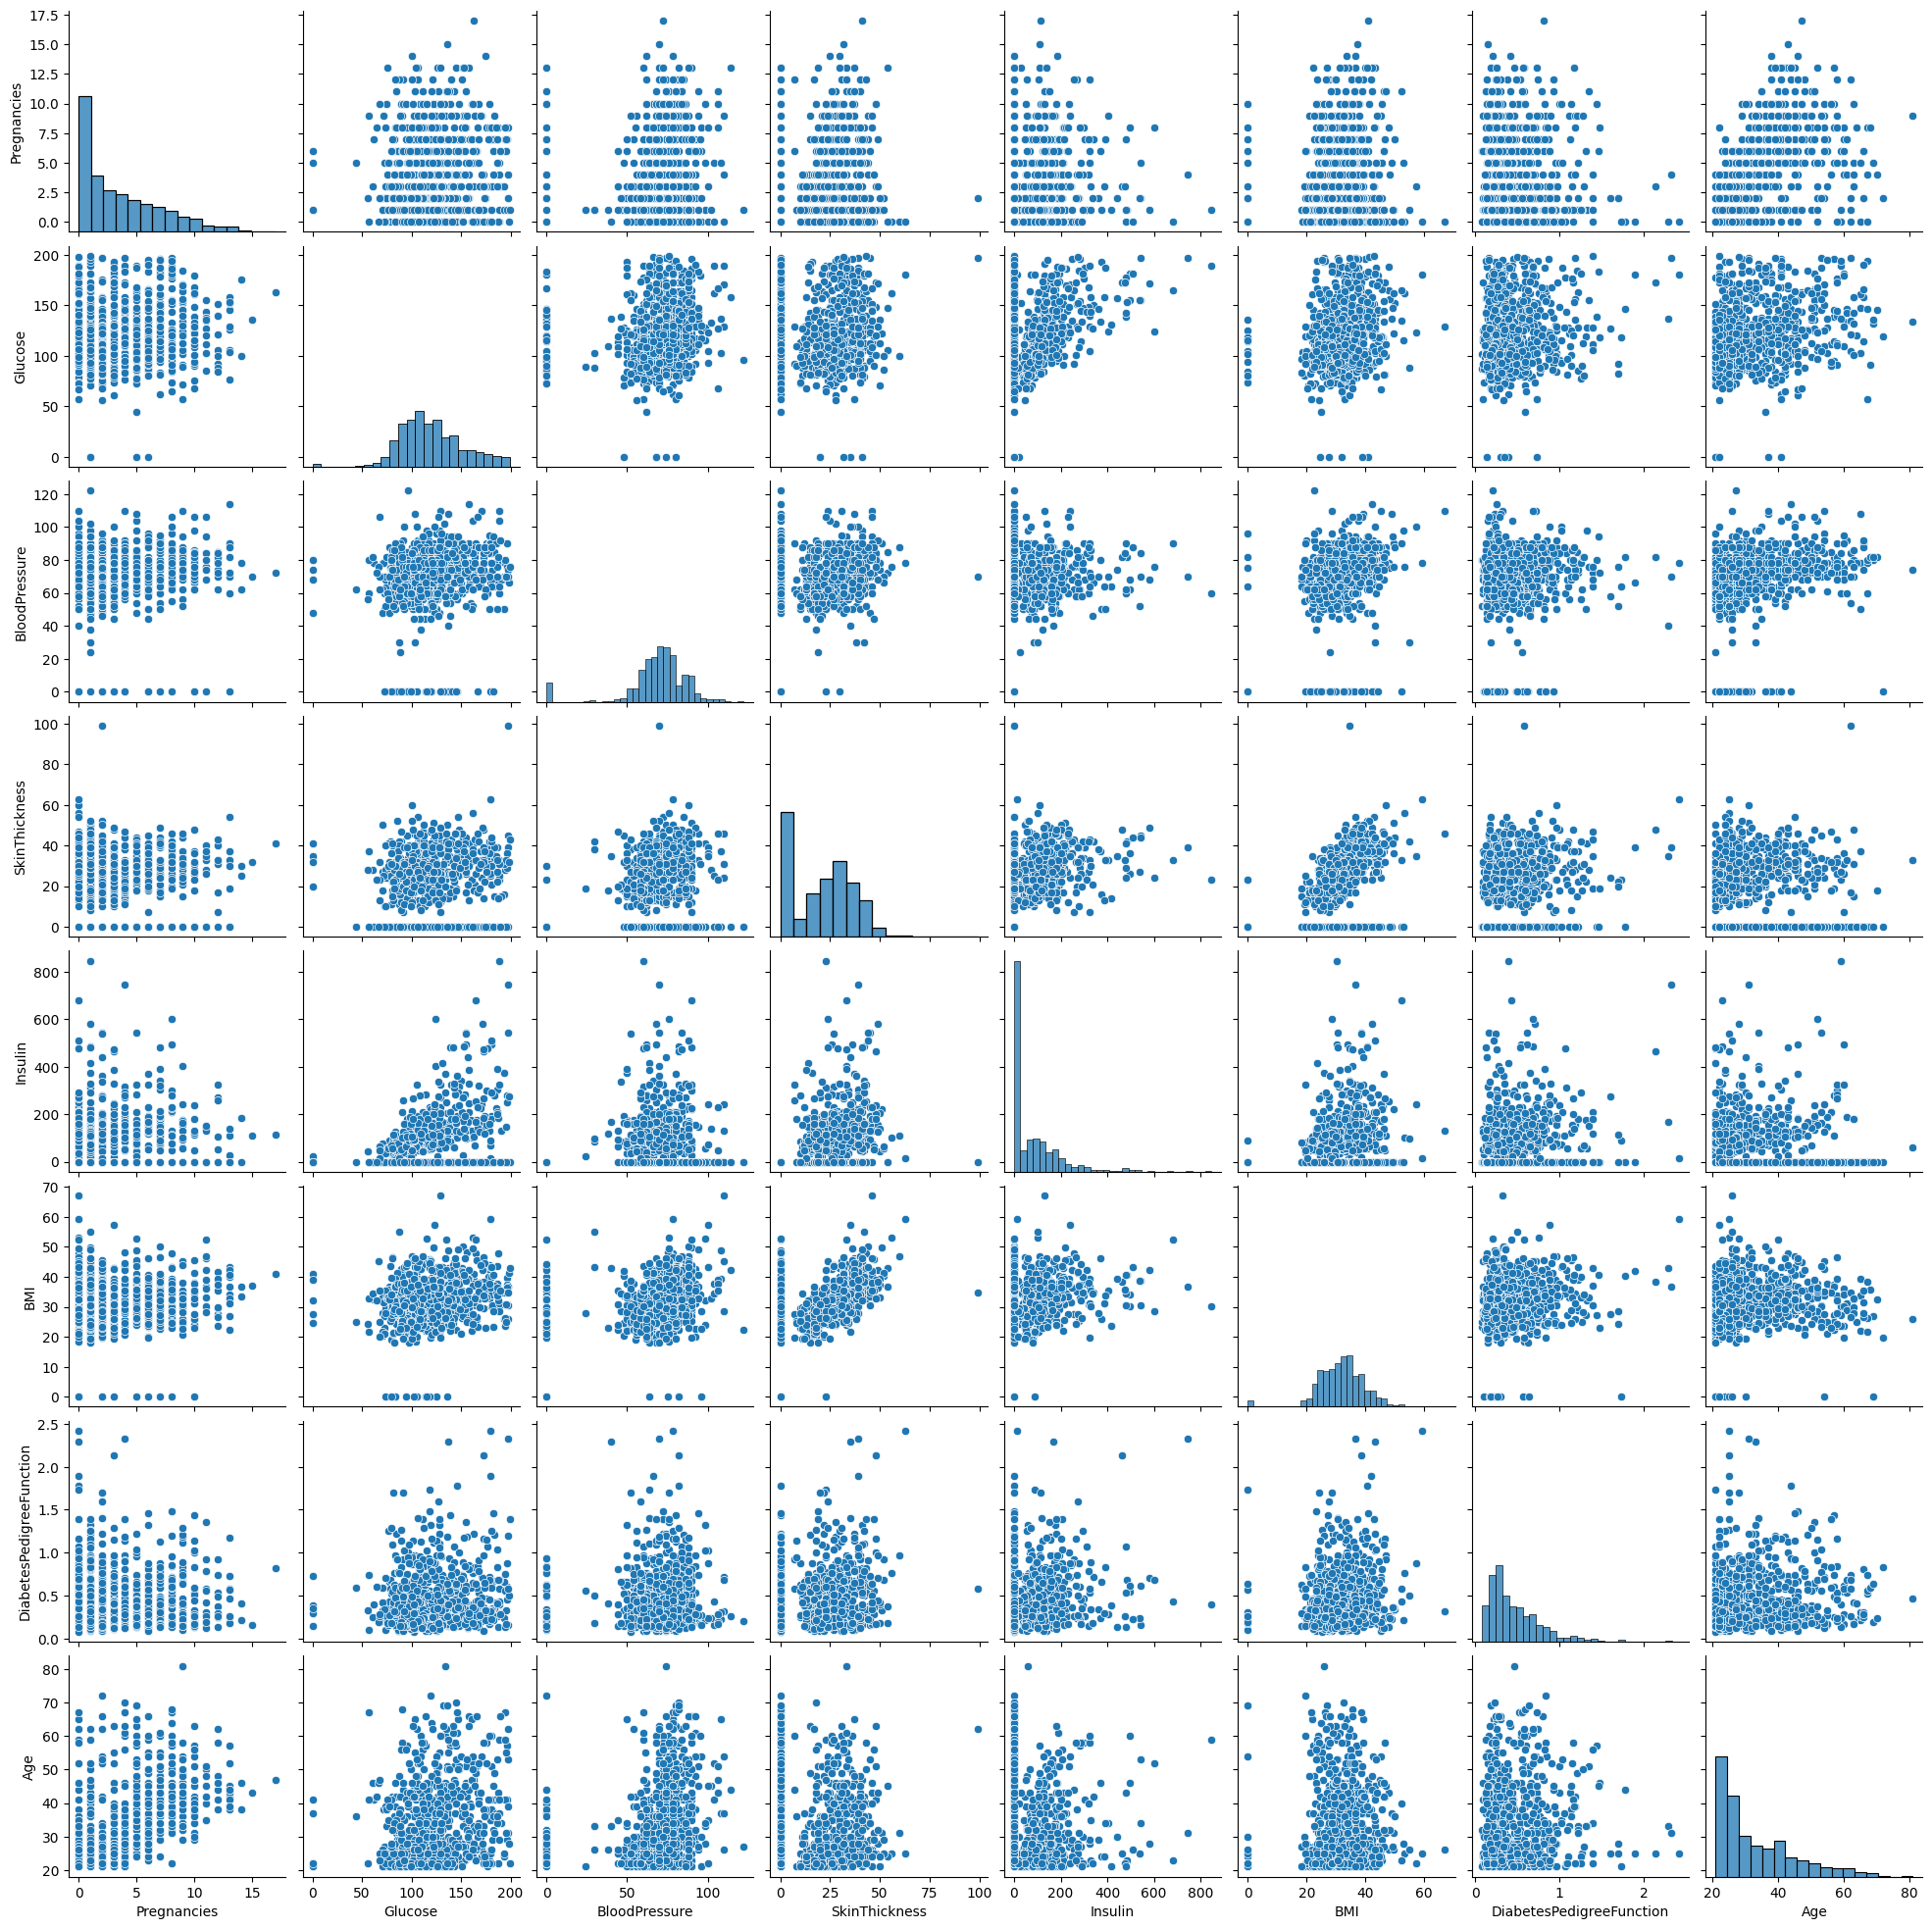

In [73]:
#Visualizacion de las variables
sns.pairplot(df)
#Observaciones:
#Pregnancies: se puede ver que los valores fuera de rango se presentan a partir de 15 para arriba
#Glucose: los valores fuera de lo normal se presentan en 0
#BloodPressure: los valores fuera de lo normal se presentan en su mayoría en 0
#SkinThickness: valores fuera de lo normal en 0 y 100
#Insulin: a partir de 400 para arriba se pueden ver valores fuera de lo normal
#BMI: inconsistencias con los valores en 0 y por encima de 50
#DiabetesPedigreeFunction: inconsistencias presentes por encima de 1.5
#Age: después de 70 hay valores fuera de lo común

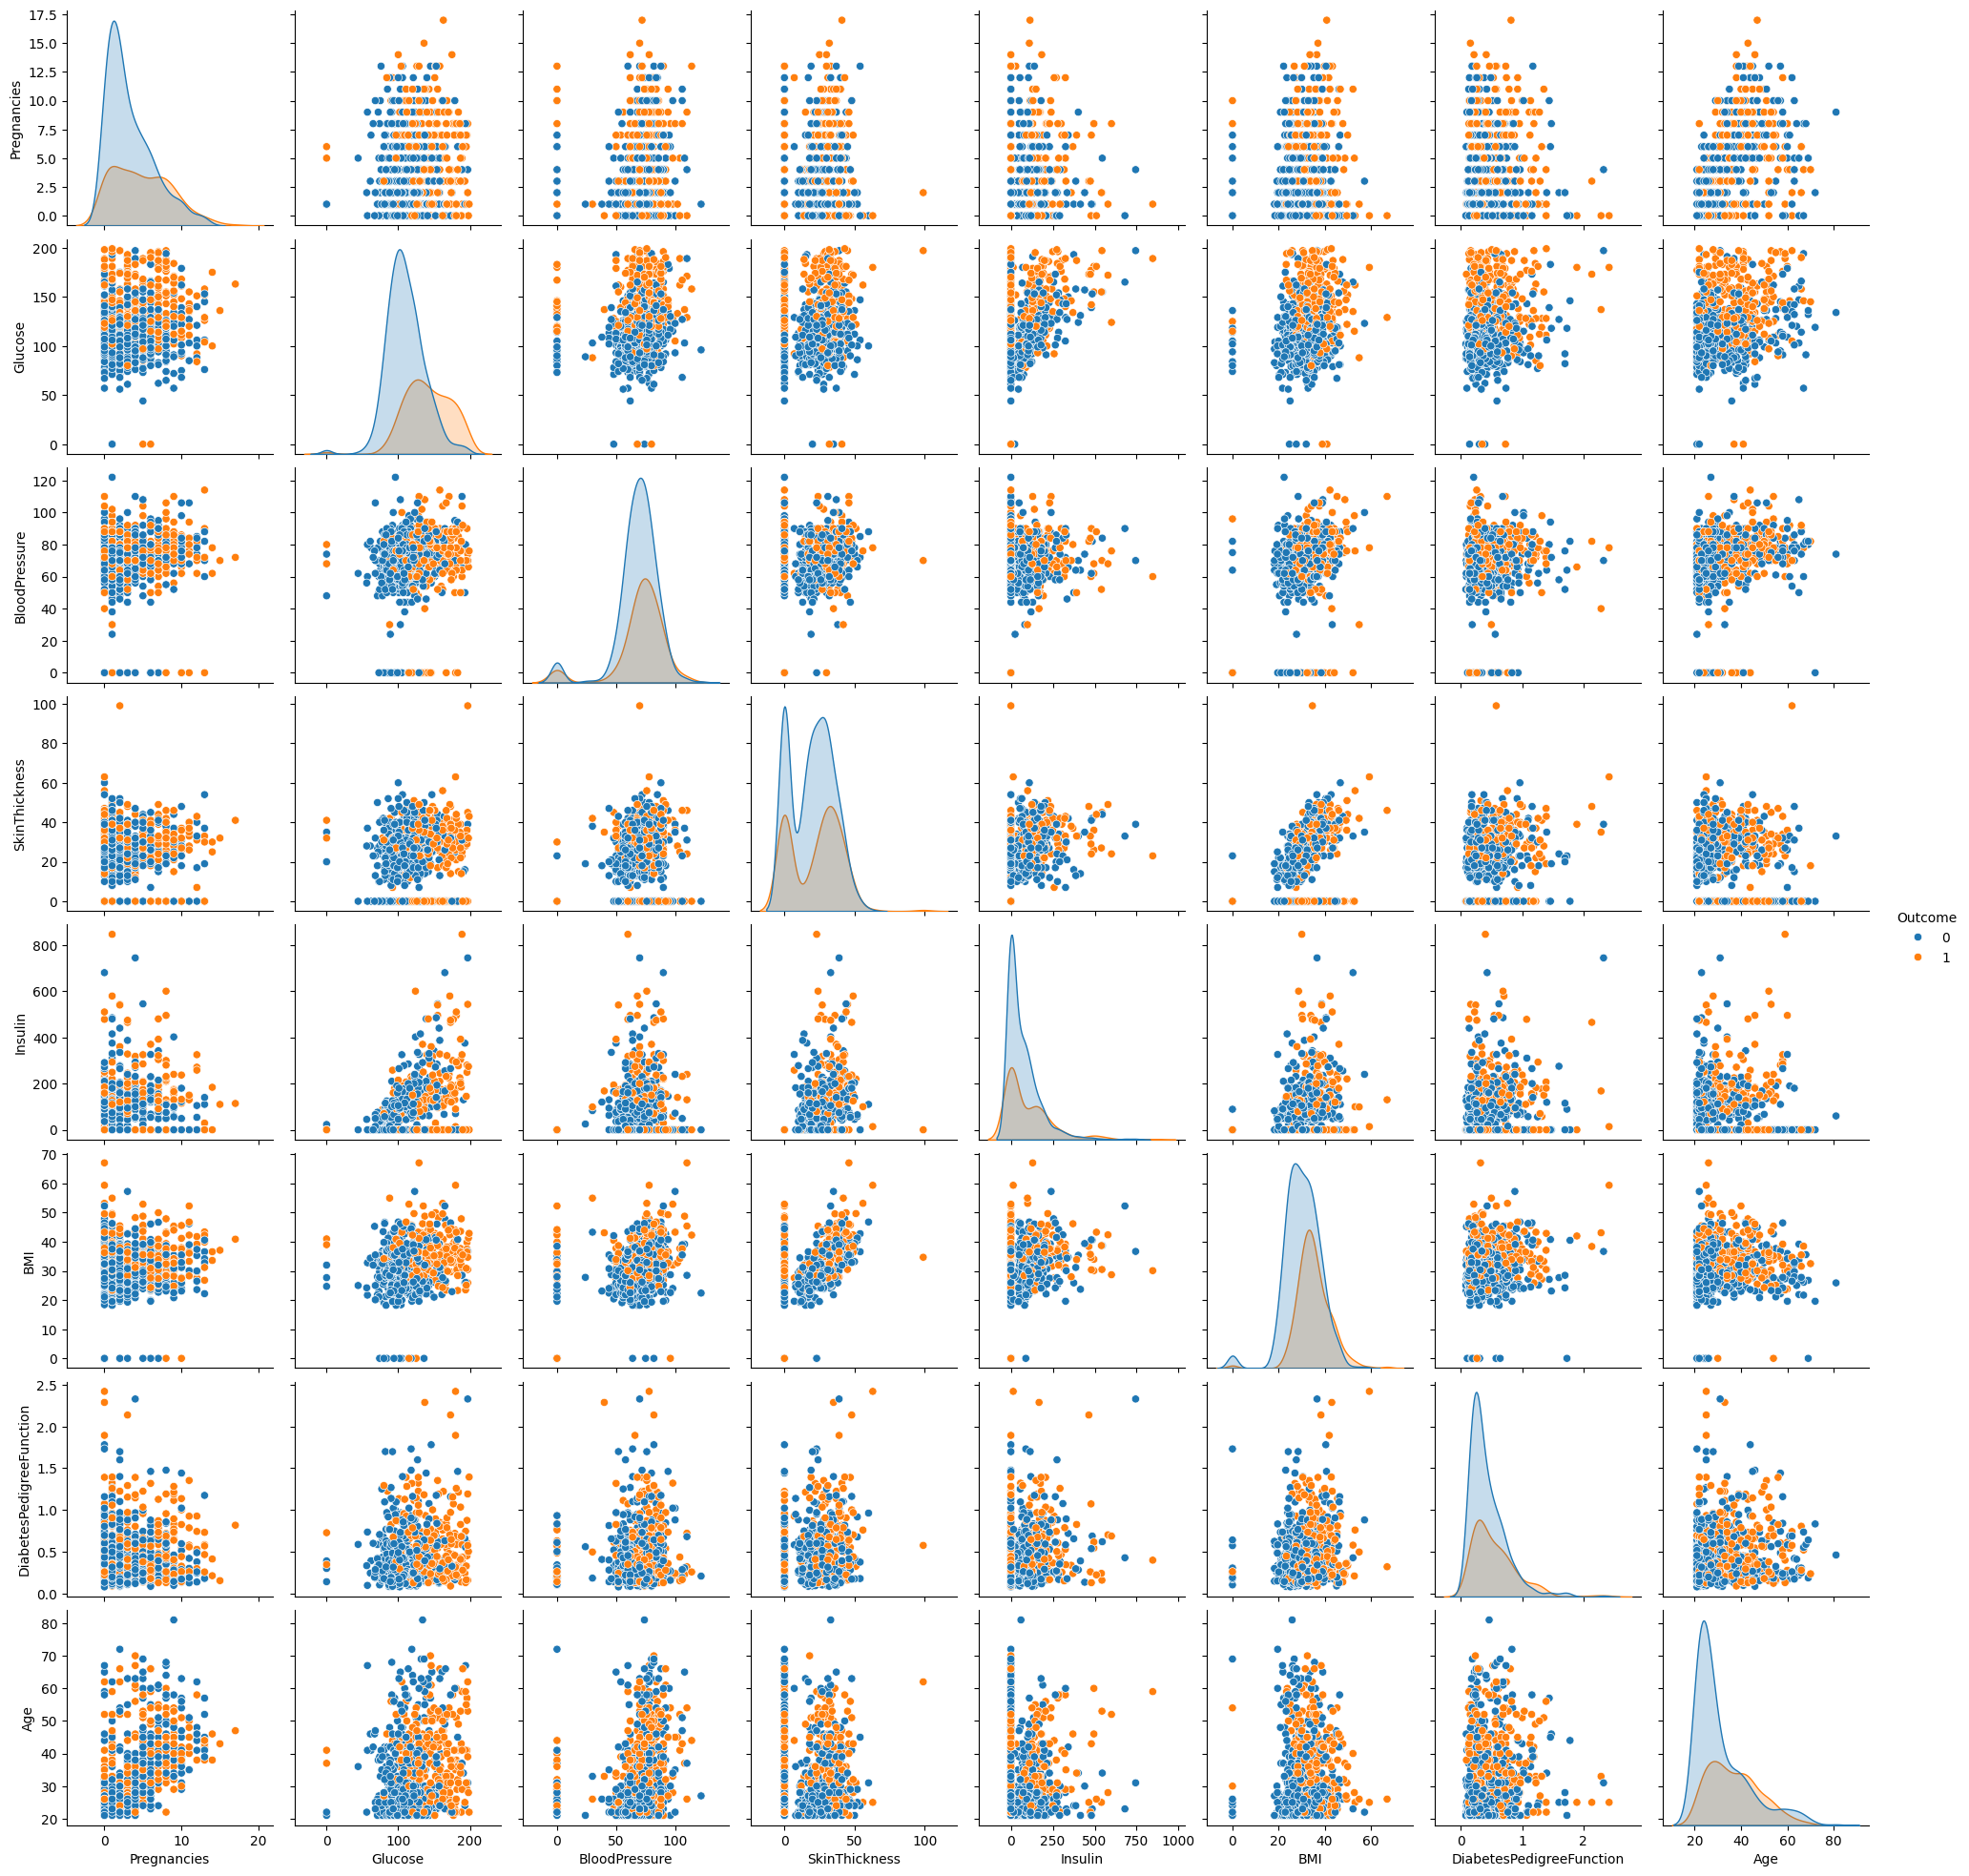

In [74]:
#Gráficos de dispersión con relación al Outcome
#Sirve para diferenciar y comparar los casos de diabetes con respecto a las variables
sns.pairplot(df, hue='Outcome') 
plt.show()

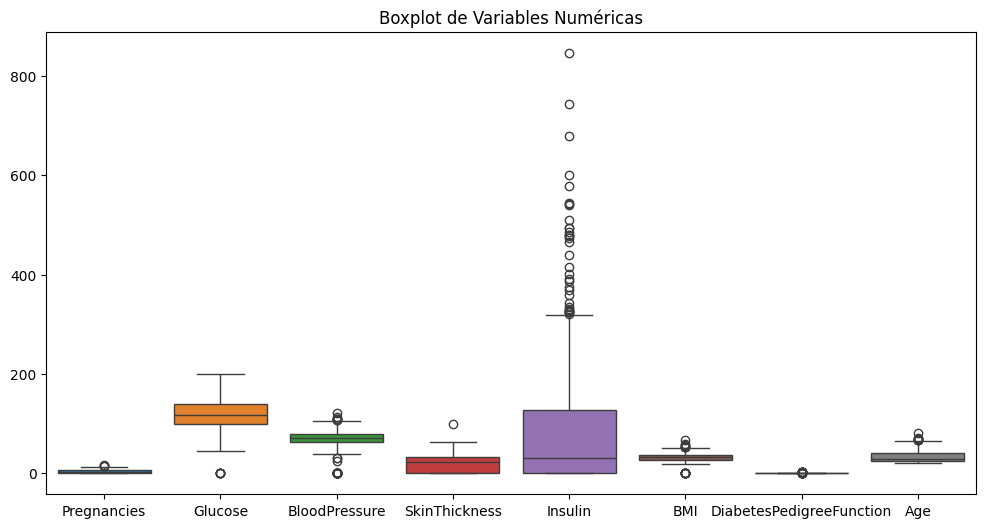

In [75]:
# Identificación y manejo de outliers con boxplots para confirmar las observaciones de los gráficos anteriores
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.title('Boxplot de Variables Numéricas')
plt.show()


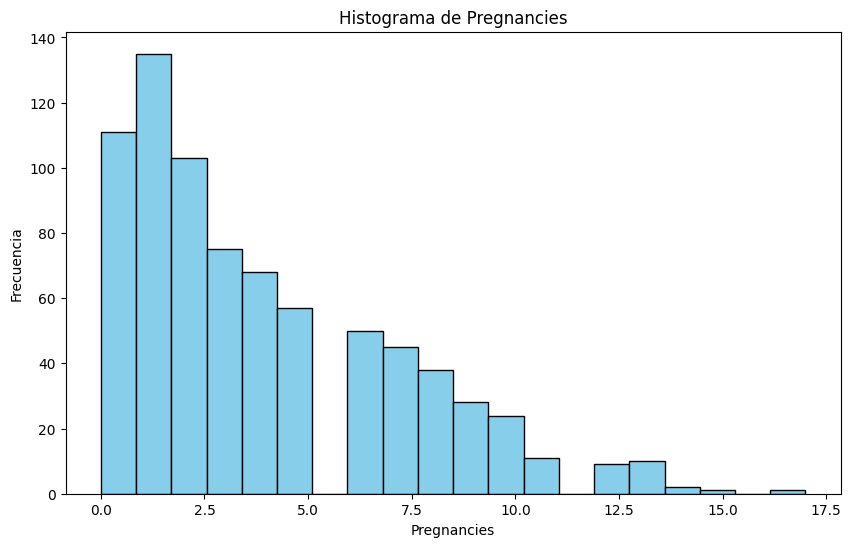

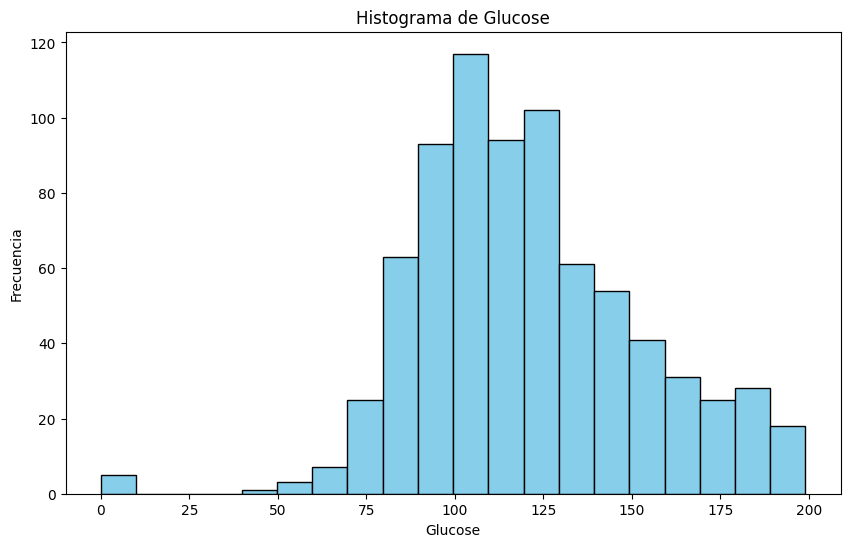

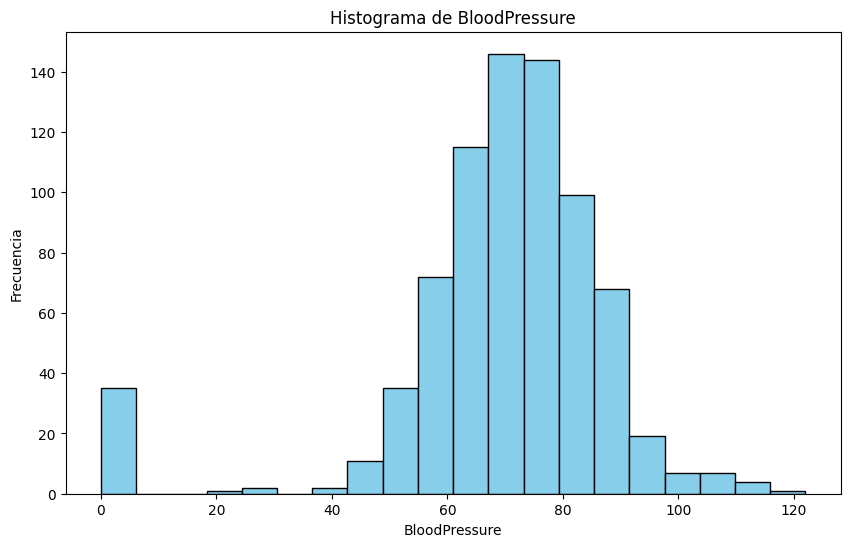

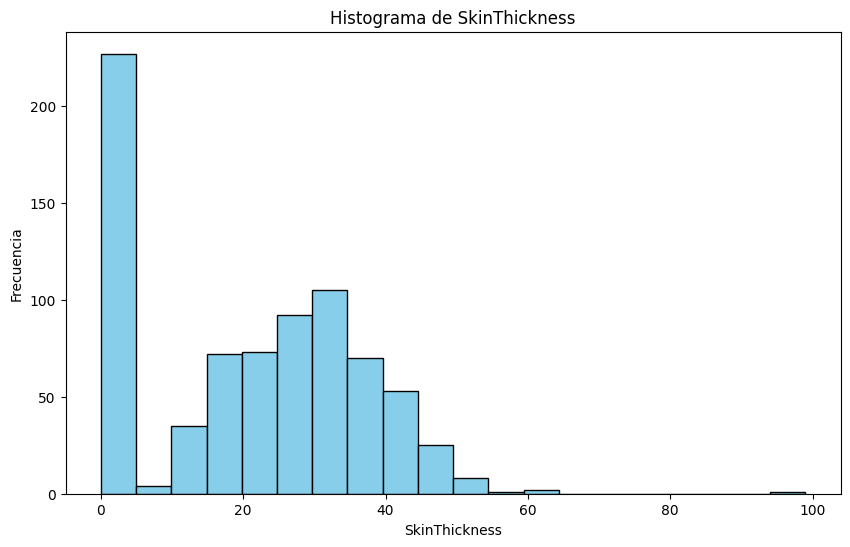

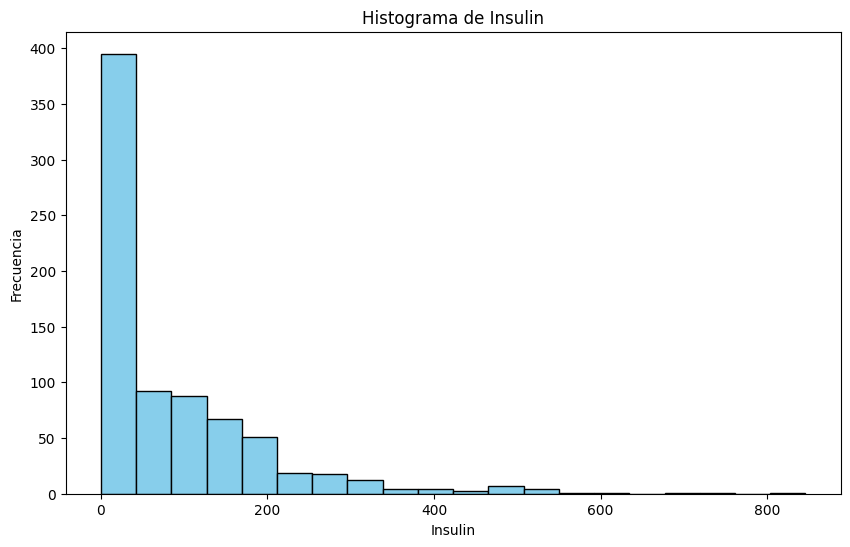

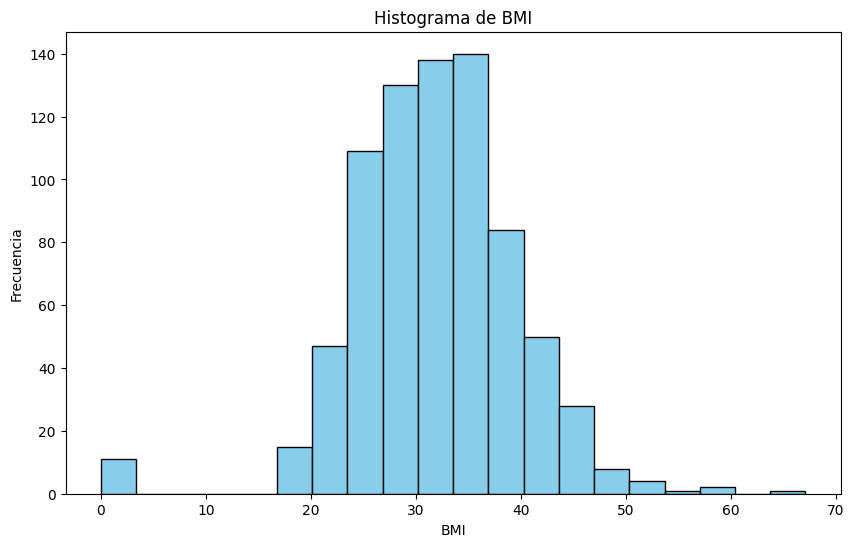

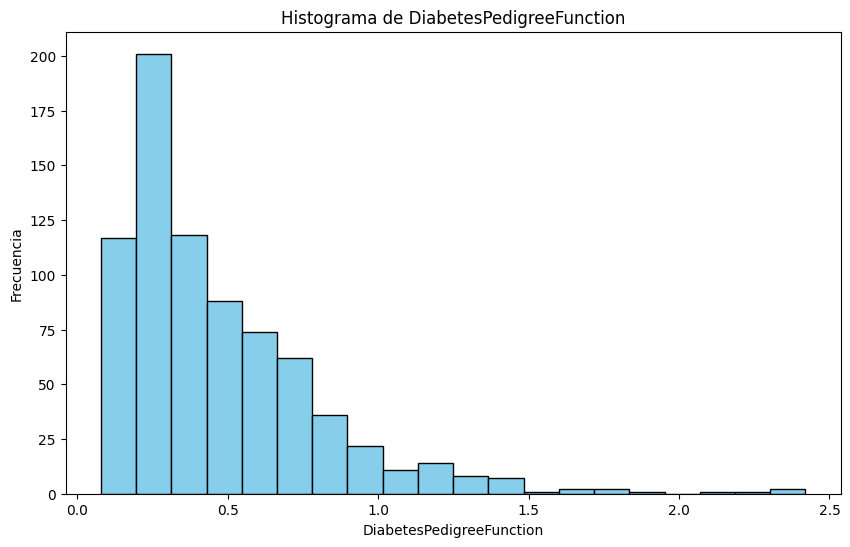

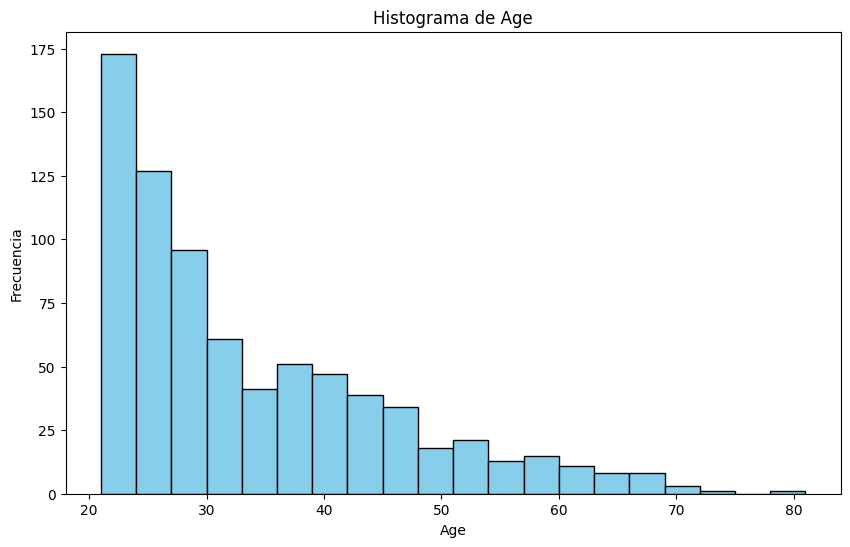

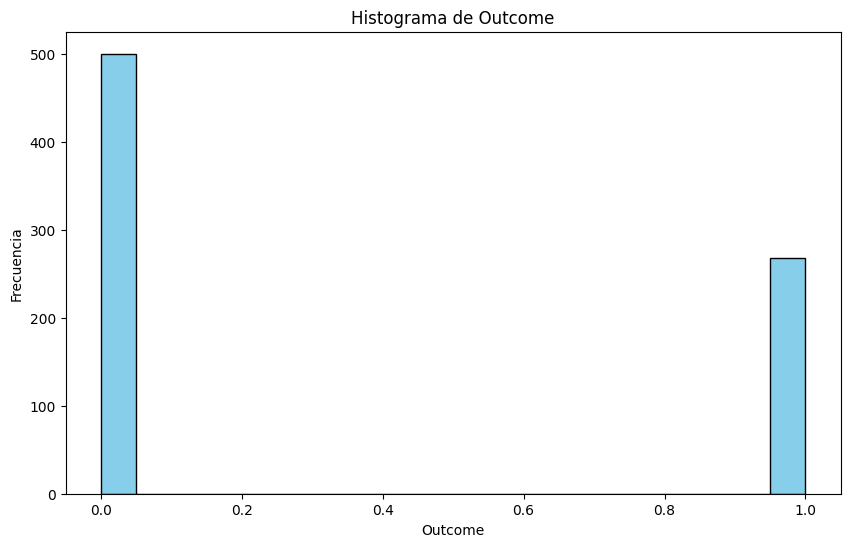

In [76]:
# Histogramas           #Visualizaciones Univariadas    
variables = df.columns
for var in variables:
    plt.figure(figsize=(10, 6))
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')
    plt.show()
#En SalePrice los precios normalmente están entre 100000 y 200000. LotArea es más frecuente entre 0 a 50000. GrLiv

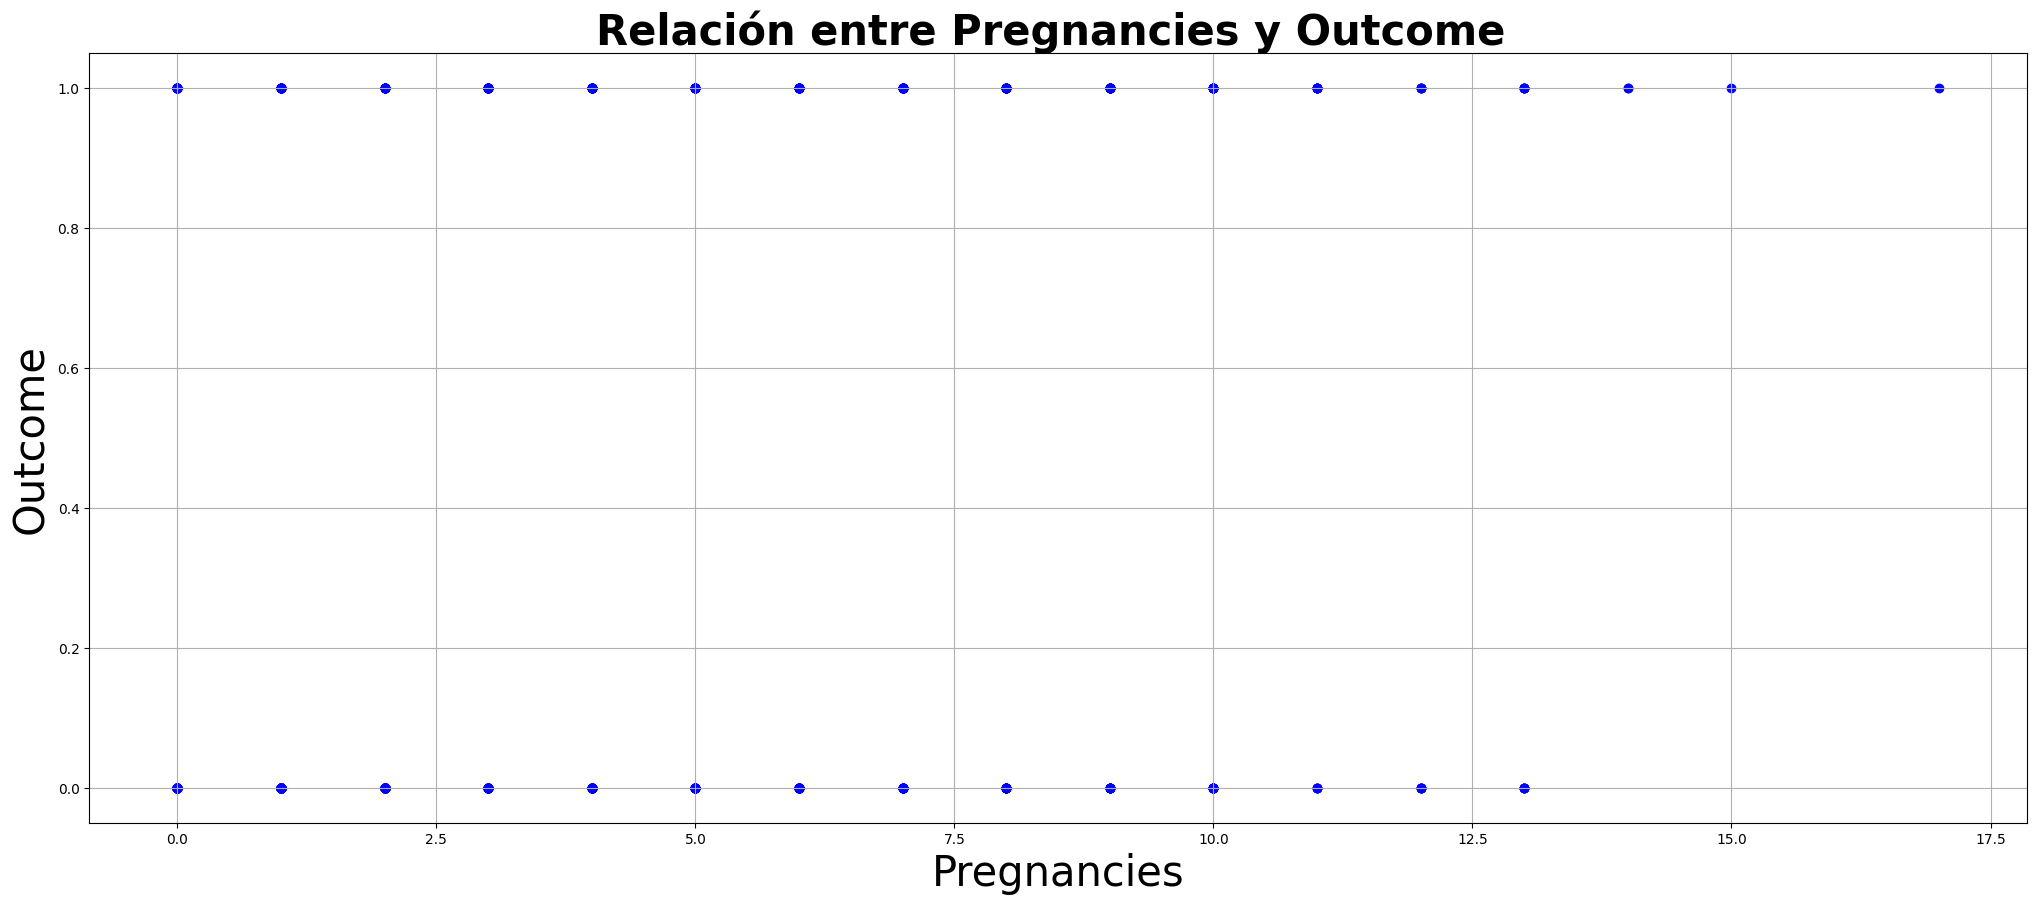

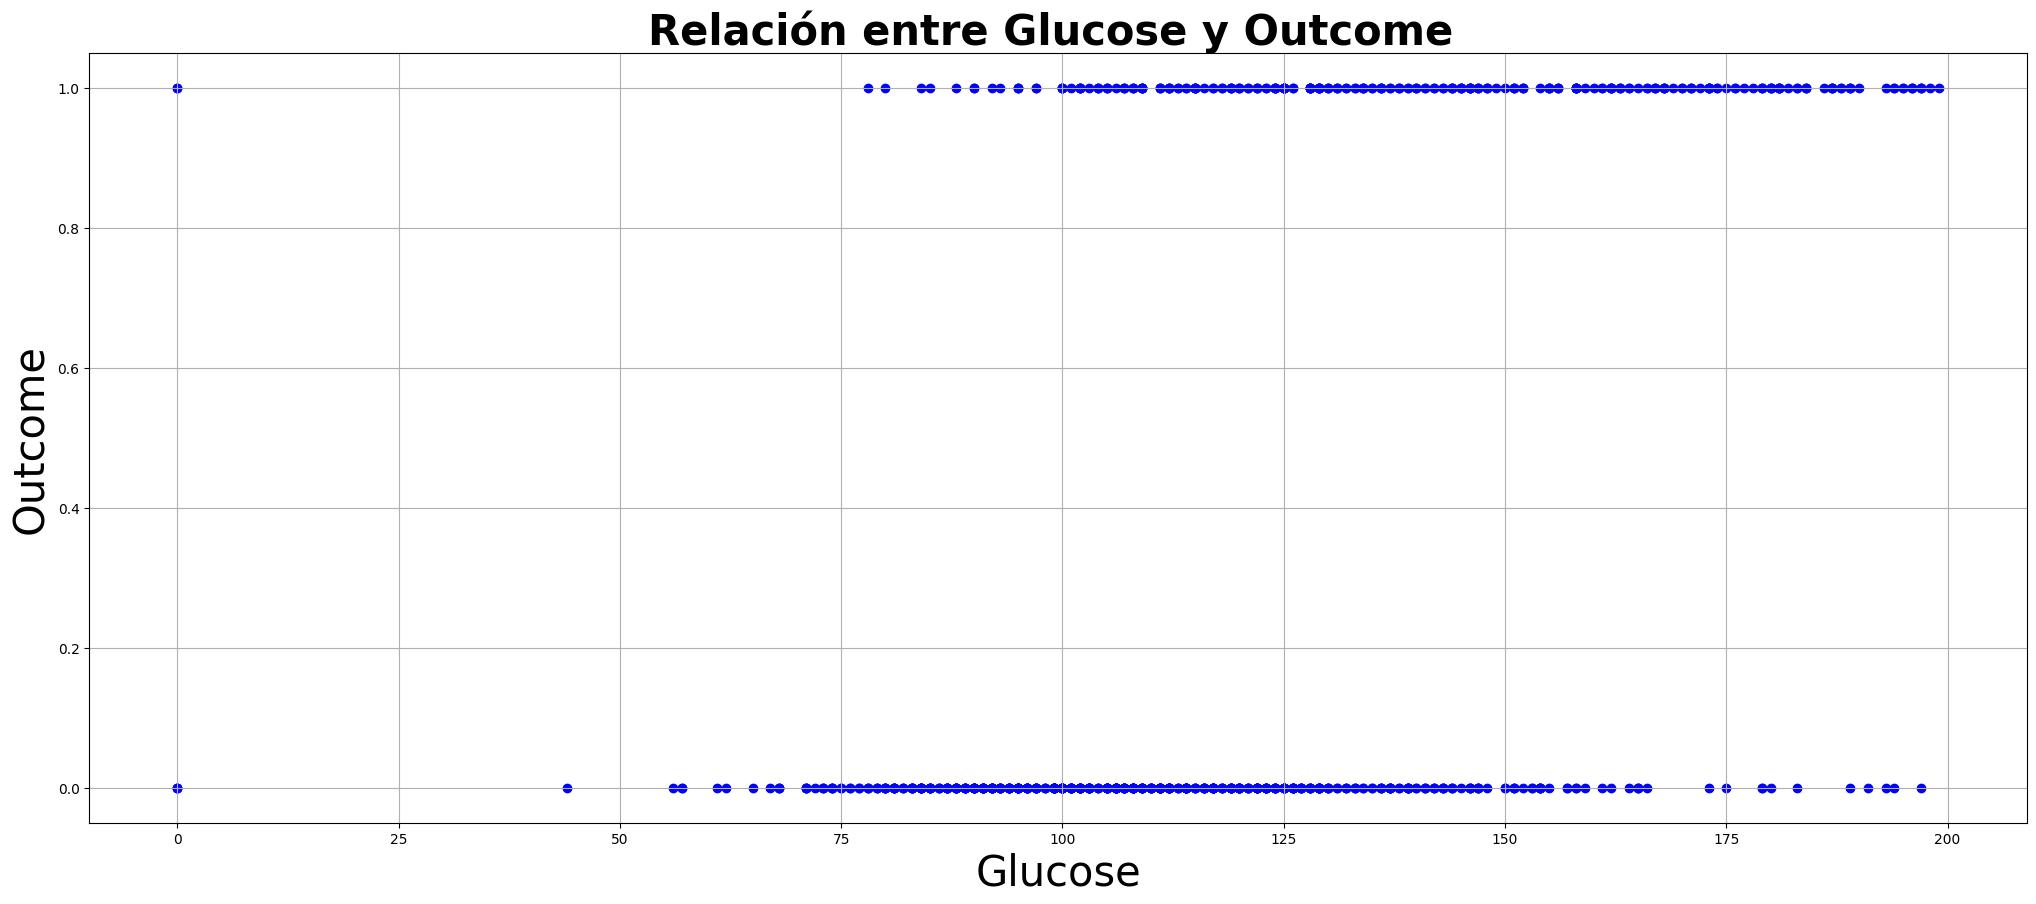

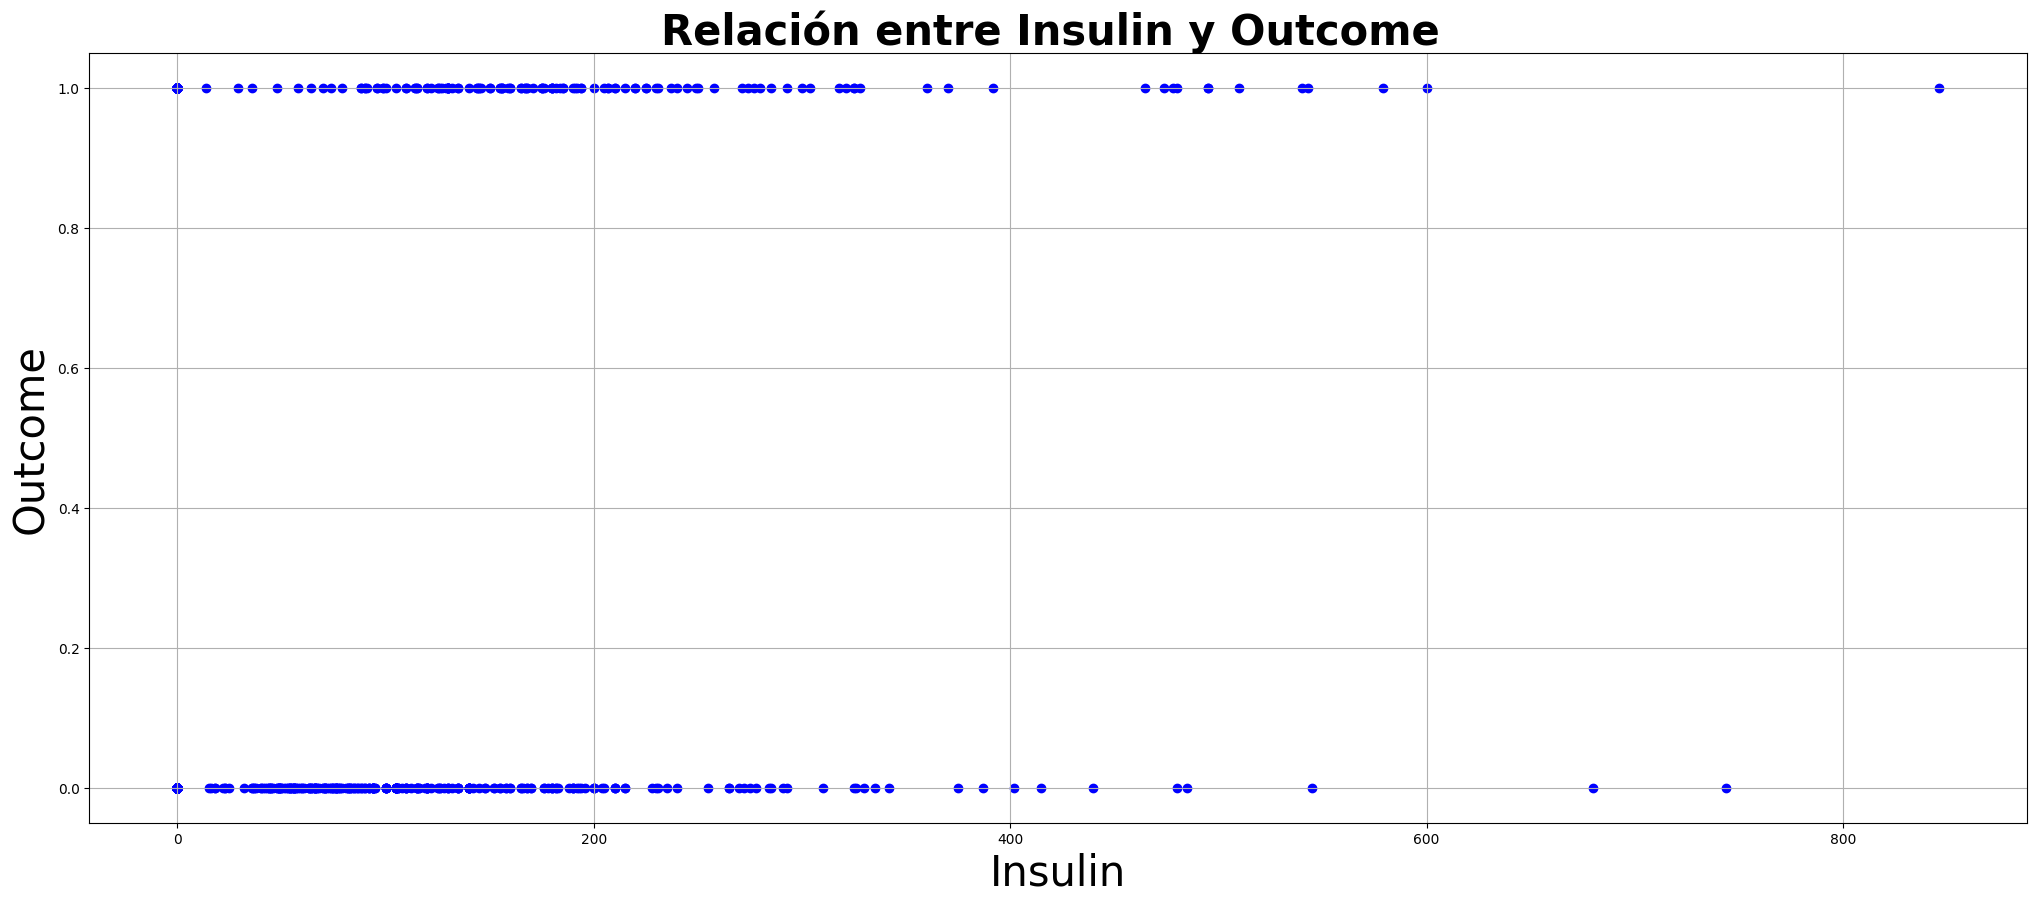

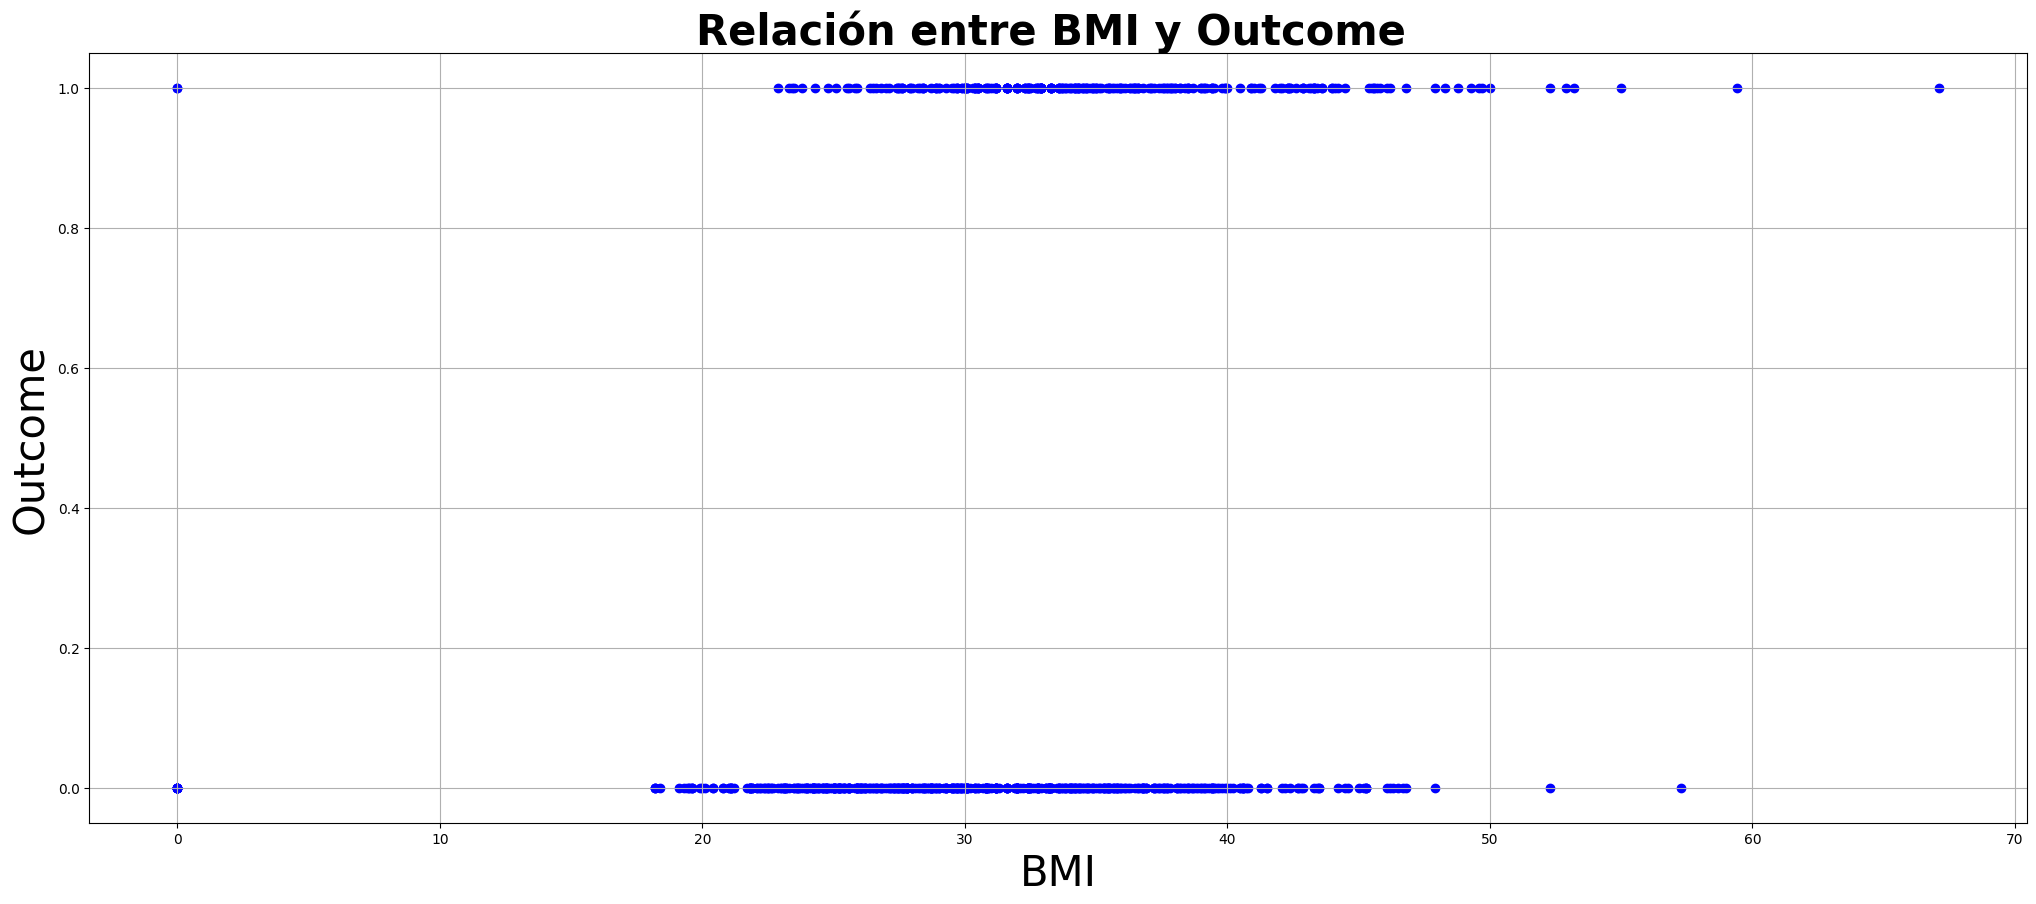

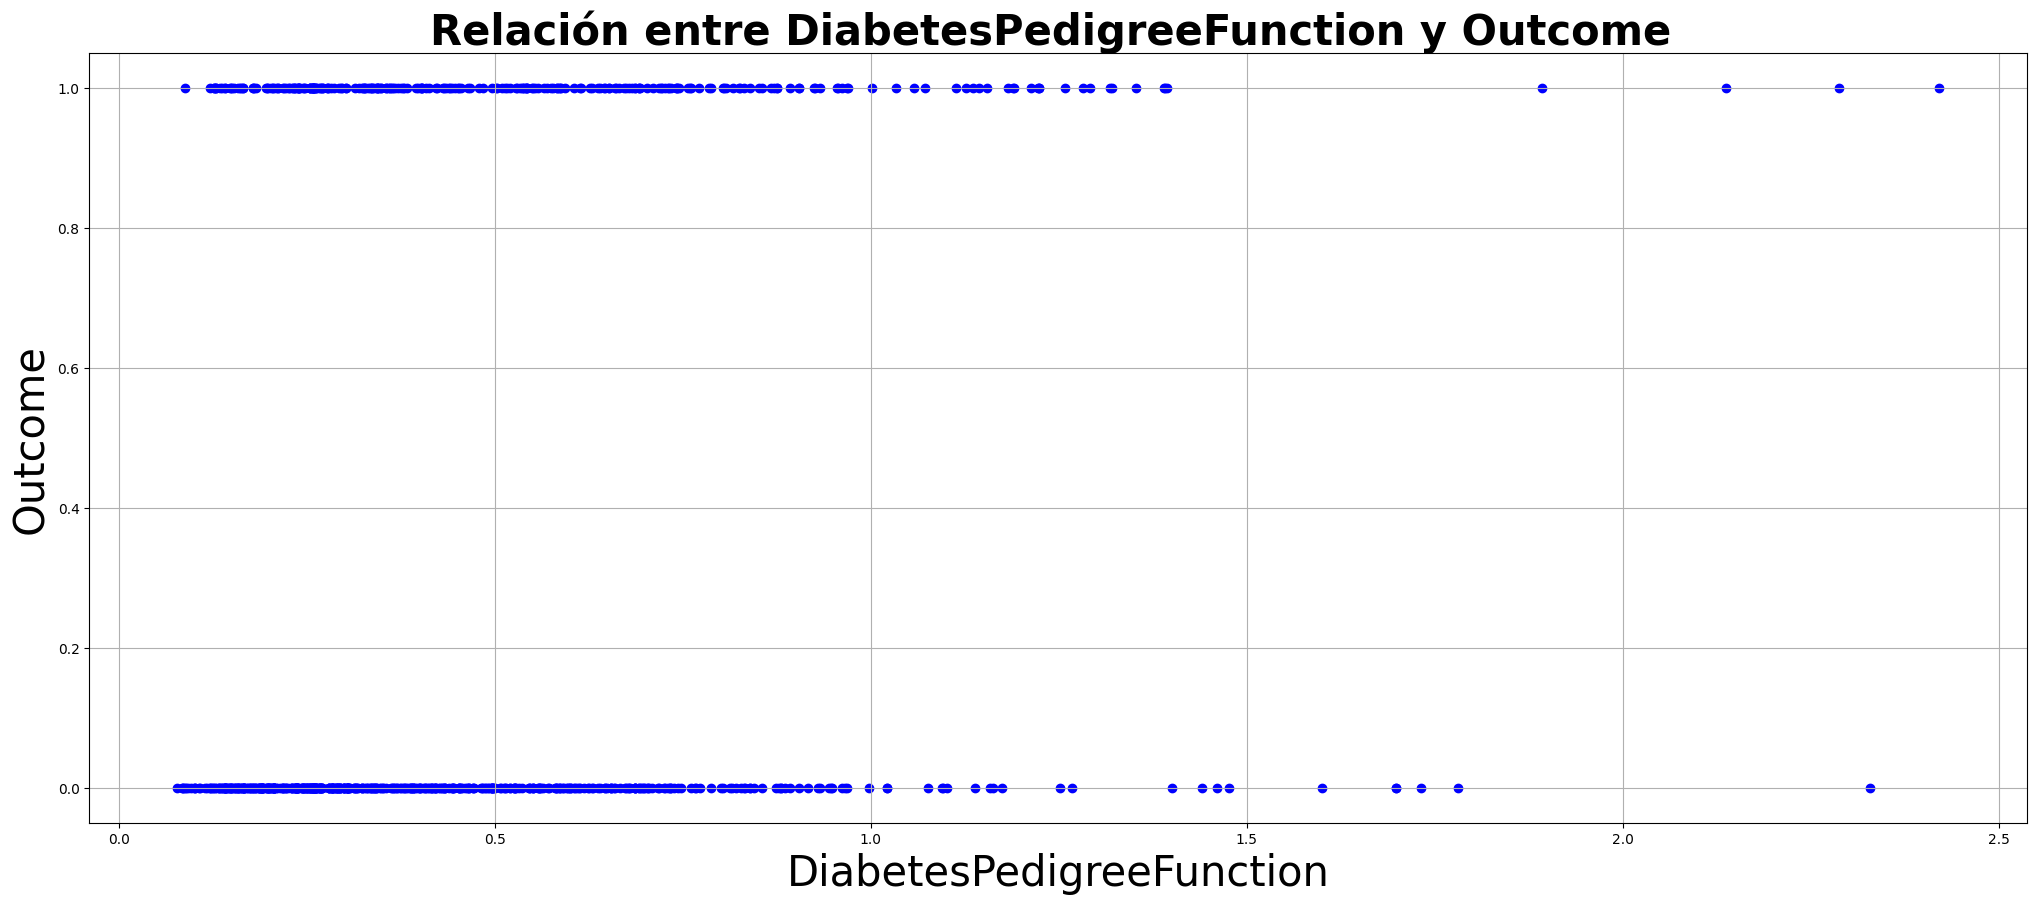

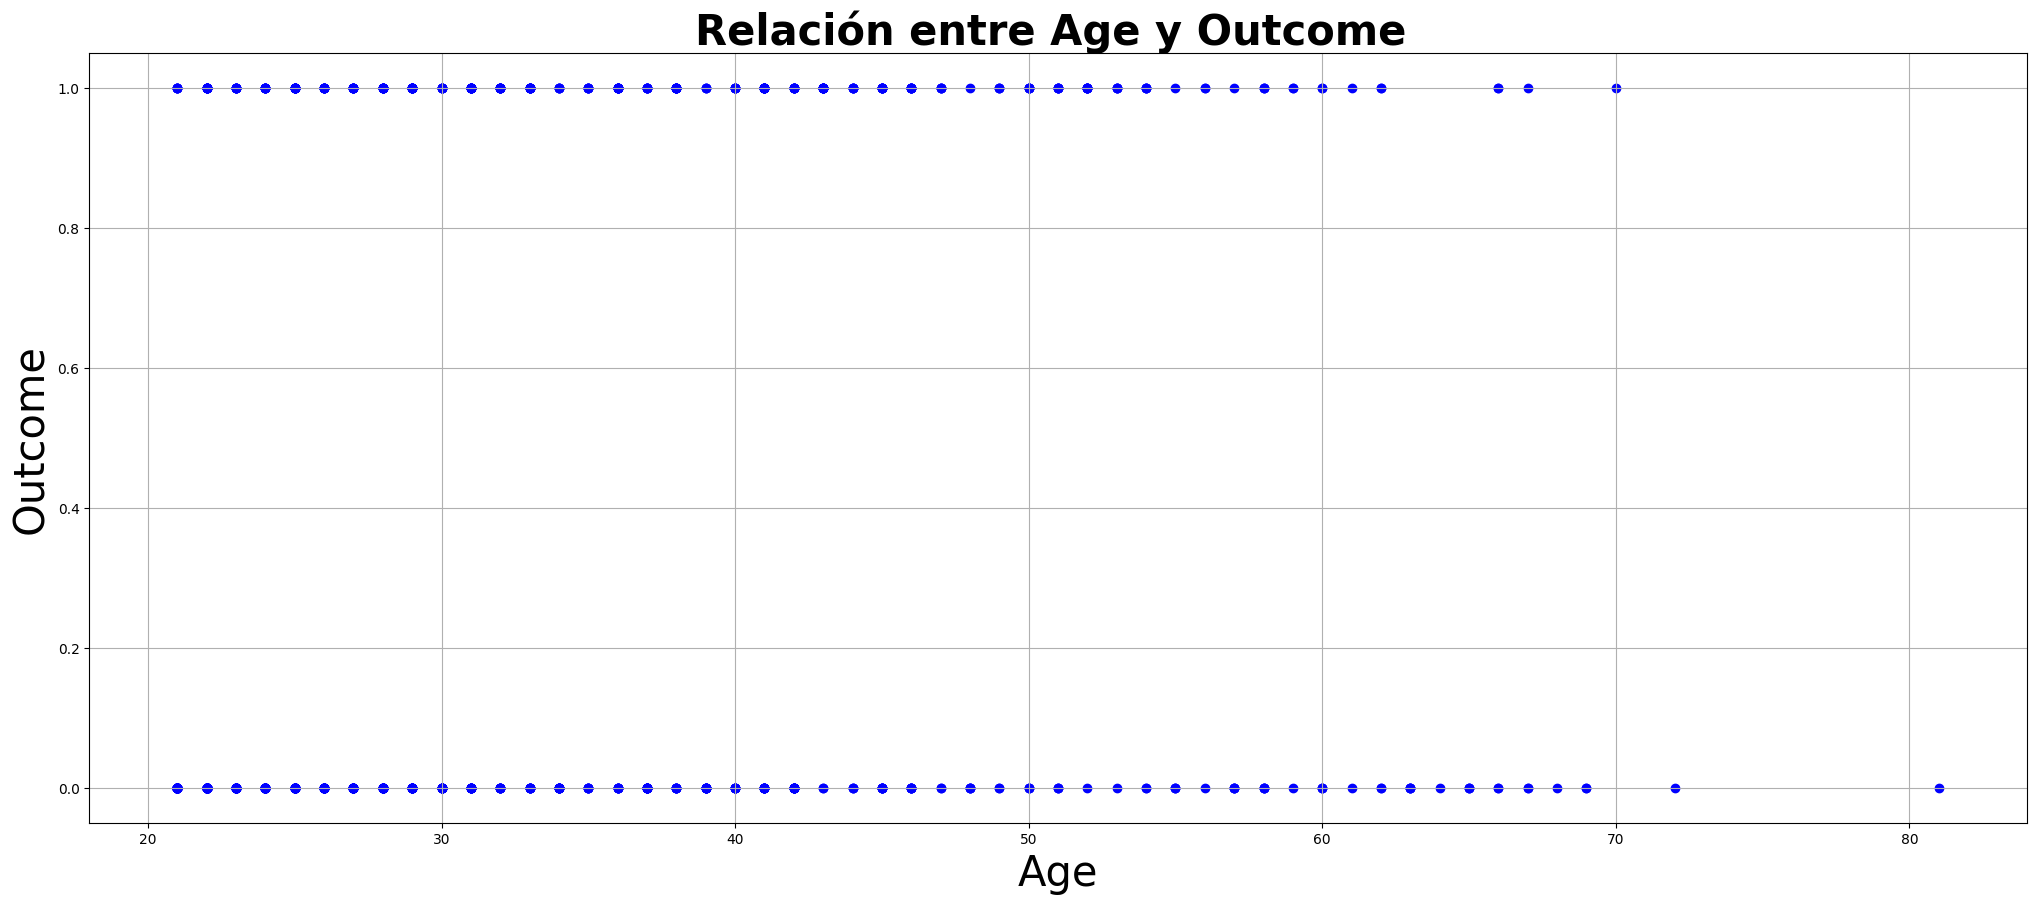

In [77]:
# Visualizaciones Multivariadas
# Diagramas de dispersión      
# Relaciones entre variables con Outcome 

plt.figure(figsize = [25, 10] ) #, dpi = 150 
plt.scatter (df["Pregnancies"] , df["Outcome"] , color = "blue")
plt.title ("Relación entre Pregnancies y Outcome " , weight = 'bold', fontsize = 30)
#plt.xticks (range (0 , 80 , 10) , fontsize = 20)
#plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('Pregnancies', fontsize = 30 )
plt.ylabel ('Outcome' , fontsize = 30)
plt.grid ()
plt.show ()

#Observaciones: se puede ver que la diabetes se presenta desde los 0 hasta los 17 embarazos, sin embargo, es menos frecuente superando los 12.

plt.figure(figsize = [25, 10] ) #, dpi = 150 
plt.scatter (df["Glucose"] , df["Outcome"] , color = "blue")
plt.title ("Relación entre Glucose y Outcome " , weight = 'bold', fontsize = 30)
#plt.xticks (range (0 , 80 , 10) , fontsize = 20)
#plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('Glucose', fontsize = 30 )
plt.ylabel ('Outcome' , fontsize = 30)
plt.grid ()
plt.show ()

#Observaciones: es inusual que se presente diabetes en pacientes con glucosa 0 hasta 75, pero superando ese nivel se pueden presentar hasta niveles de glucosa de 200.

plt.figure(figsize = [25, 10] ) #, dpi = 150 
plt.scatter (df["Insulin"] , df["Outcome"] , color = "blue")
plt.title ("Relación entre Insulin y Outcome " , weight = 'bold', fontsize = 30)
#plt.xticks (range (0 , 80 , 10) , fontsize = 20)
#plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('Insulin', fontsize = 30 )
plt.ylabel ('Outcome' , fontsize = 30)
plt.grid ()
plt.show ()

#Observaciones: existe una brecha de pacientes con diabetes llegando y superando los niveles de 400 de insulina.

plt.figure(figsize = [25, 10] ) #, dpi = 150 
plt.scatter (df["BMI"] , df["Outcome"] , color = "blue")
plt.title ("Relación entre BMI y Outcome " , weight = 'bold', fontsize = 30)
#plt.xticks (range (0 , 80 , 10) , fontsize = 20)
#plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('BMI', fontsize = 30 )
plt.ylabel ('Outcome' , fontsize = 30)
plt.grid ()
plt.show ()

#Observaciones: los pacientes con diabetes suelen estar en el rango de BMI de 20 a 60 aproximadamente.

plt.figure(figsize = [25, 10] ) #, dpi = 150 
plt.scatter (df["DiabetesPedigreeFunction"] , df["Outcome"] , color = "blue")
plt.title ("Relación entre DiabetesPedigreeFunction y Outcome " , weight = 'bold', fontsize = 30)
#plt.xticks (range (0 , 80 , 10) , fontsize = 20)
#plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('DiabetesPedigreeFunction', fontsize = 30 )
plt.ylabel ('Outcome' , fontsize = 30)
plt.grid ()
plt.show ()

#Observaciones: la relación entre el diabetespedigreefunction y la diabetes se suele presentar desde los valores 0 hasta aproximadamente 2.

plt.figure(figsize = [25, 10] ) #, dpi = 150 
plt.scatter (df["Age"] , df["Outcome"] , color = "blue")
plt.title ("Relación entre Age y Outcome " , weight = 'bold', fontsize = 30)
#plt.xticks (range (0 , 80 , 10) , fontsize = 20)
#plt.yticks (range (20 , 90 , 10) , fontsize = 20)
plt.xlabel ('Age', fontsize = 30 )
plt.ylabel ('Outcome' , fontsize = 30)
plt.grid ()
plt.show ()

#Observaciones: el rango de edad en que la diabetes es más frecuente va desde los 20 hasta los 70.

2.2. Estadísticas descriptivas

In [78]:
#Visualizar estadísticas para identificar valores faltantes 

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


3. Implementación de Modelos: (Parte 1: Sin imputar nada en valores 0)
Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

3.1. Preprocesamiento de Datos

In [79]:
#Transformación de Columnas

## Escalar características numéricas
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = scaler.fit_transform(df[num_cols])

In [80]:
# División del Conjunto de Datos
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y pmgv brueba
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (614, 8)
Tamaño del conjunto de prueba: (154, 8)


3.2. Modelos de Clasificación

In [81]:
##Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Crear el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1-Score:", f1_rf)
print("Random Forest - ROC-AUC:", roc_auc_rf)



Random Forest - Accuracy: 0.7272727272727273
Random Forest - Precision: 0.6181818181818182
Random Forest - Recall: 0.6181818181818182
Random Forest - F1-Score: 0.6181818181818182
Random Forest - ROC-AUC: 0.703030303030303


In [82]:
## Xgboost
import xgboost as xgb

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_pred_xgb)

print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - Precision:", precision_xgb)
print("XGBoost - Recall:", recall_xgb)
print("XGBoost - F1-Score:", f1_xgb)
print("XGBoost - ROC-AUC:", roc_auc_xgb)


XGBoost - Accuracy: 0.7077922077922078
XGBoost - Precision: 0.5806451612903226
XGBoost - Recall: 0.6545454545454545
XGBoost - F1-Score: 0.6153846153846154
XGBoost - ROC-AUC: 0.6959595959595959


c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [83]:
## AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Crear el modelo AdaBoost
ada_model = AdaBoostClassifier(random_state=42)

# Entrenar el modelo
ada_model.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred_ada = ada_model.predict(X_test)

# Evaluar el modelo
accuracy_ada = accuracy_score(y_test, y_pred_ada)
precision_ada = precision_score(y_test, y_pred_ada)
recall_ada = recall_score(y_test, y_pred_ada)
f1_ada = f1_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_ada)

print("AdaBoost - Accuracy:", accuracy_ada)
print("AdaBoost - Precision:", precision_ada)
print("AdaBoost - Recall:", recall_ada)
print("AdaBoost - F1-Score:", f1_ada)
print("AdaBoost - ROC-AUC:", roc_auc_ada)


AdaBoost - Accuracy: 0.7337662337662337
AdaBoost - Precision: 0.625
AdaBoost - Recall: 0.6363636363636364
AdaBoost - F1-Score: 0.6306306306306306
AdaBoost - ROC-AUC: 0.712121212121212


c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [84]:
## GradientBoosting

from sklearn.ensemble import GradientBoostingClassifier

# Crear el modelo Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Predecir los valores del conjunto de prueba
y_pred_gb = gb_model.predict(X_test)

# Evaluar el modelo
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)

print("Gradient Boosting - Accuracy:", accuracy_gb)
print("Gradient Boosting - Precision:", precision_gb)
print("Gradient Boosting - Recall:", recall_gb)
print("Gradient Boosting - F1-Score:", f1_gb)
print("Gradient Boosting - ROC-AUC:", roc_auc_gb)


Gradient Boosting - Accuracy: 0.7467532467532467
Gradient Boosting - Precision: 0.6379310344827587
Gradient Boosting - Recall: 0.6727272727272727
Gradient Boosting - F1-Score: 0.6548672566371682
Gradient Boosting - ROC-AUC: 0.7303030303030302


In [85]:
# Comparación de resultados
# Crear el DataFrame de resultados 
results = pd.DataFrame({
    'Modelo': ['Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [accuracy_rf, accuracy_xgb, accuracy_ada, accuracy_gb],
    'Precision': [precision_rf, precision_xgb, precision_ada, precision_gb],
    'Recall': [recall_rf, recall_xgb, recall_ada, recall_gb],
    'F1-Score': [f1_rf, f1_xgb, f1_ada, f1_gb],
    'ROC-AUC': [roc_auc_rf, roc_auc_xgb, roc_auc_ada, roc_auc_gb]
})

# Mostrar el DataFrame de resultados
print(results.T)
#print(f'{"Resultados":} ', results)


# Crear un DataFrame para los rankings
#rankings = results.copy()

# Añadir rankings para cada métrica
#rankings['Rank_Accuracy'] = rankings['Accuracy'].rank(ascending=False)
#rankings['Rank_Precision'] = rankings['Precision'].rank(ascending=False)
#rankings['Rank_Recall'] = rankings['Recall'].rank(ascending=False)
#rankings['Rank_F1-Score'] = rankings['F1-Score'].rank(ascending=False)
#rankings['Rank_ROC-AUC'] = rankings['ROC-AUC'].rank(ascending=False)

# Mostrar los rankings
#print(f'{"Rankings de resultados":} ', rankings)

# Crear un ranking general basado en la suma de las posiciones en cada métrica
#rankings['Rank_Sum'] = rankings[['Rank_Accuracy', 'Rank_Precision', 'Rank_Recall', 'Rank_F1-Score', 'Rank_ROC-AUC']].sum(axis=1)
#rankings = rankings.sort_values('Rank_Sum')

# Mostrar el ranking general
#print(f'{"Ranking General de resultados":} ', rankings)


                       0         1         2                  3
Modelo     Random Forest   XGBoost  AdaBoost  Gradient Boosting
Accuracy        0.727273  0.707792  0.733766           0.746753
Precision       0.618182  0.580645     0.625           0.637931
Recall          0.618182  0.654545  0.636364           0.672727
F1-Score        0.618182  0.615385  0.630631           0.654867
ROC-AUC          0.70303   0.69596  0.712121           0.730303


Análisis Comparativo
Gradient Boosting
Exactitud: Tiene la mayor exactitud (0.746753), lo que sugiere que predice correctamente con mayor frecuencia.
Precisión: La precisión más alta (0.637931), indica que tiene menos falsos positivos.
Recall: Buen recall (0.672727), lo que indica una buena capacidad de detección de casos positivos.
F1-Score: Mayor F1-Score (0.654867), indicando un buen balance entre precisión y recall.
ROC-AUC: El más alto (0.730303), lo que sugiere mejor discriminación entre clases.

AdaBoost
Exactitud: Buena exactitud (0.733766), ligeramente menor que Gradient Boosting.
Precisión: Buena precisión (0.625), pero menor que Gradient Boosting.
Recall: Similar recall a Gradient Boosting (0.636364).
F1-Score: Menor F1-Score (0.630631) comparado con Gradient Boosting.
ROC-AUC: Menor que Gradient Boosting (0.712121), pero sigue siendo razonable.

XGBoost
Exactitud: La más baja (0.707792), sugiere menor capacidad general de predicción correcta.
Precisión: Menor precisión (0.580645), indicando más falsos positivos.
Recall: Buen recall (0.654545), similar a Gradient Boosting.
F1-Score: Menor F1-Score (0.615385), menor balance entre precisión y recall.
ROC-AUC: La más baja (0.69596), menor capacidad de discriminación entre clases.

Random Forest
Exactitud: Buena exactitud (0.727273), similar a AdaBoost.
Precisión: Buena precisión (0.618182), pero menor que Gradient Boosting.
Recall: Buen recall (0.618182), pero menor que Gradient Boosting y XGBoost.
F1-Score: Balance medio (0.618182) entre precisión y recall.
ROC-AUC: Mejor que XGBoost pero menor que Gradient Boosting y AdaBoost (0.70303).

Conclusiones
Gradient Boosting es el modelo más robusto y fiable en general, con las mejores métricas en exactitud, precisión, F1-Score y ROC-AUC.
AdaBoost y Random Forest muestran un rendimiento bastante bueno, aunque ligeramente inferior a Gradient Boosting.
XGBoost tiene el rendimiento más bajo en este contexto específico, lo cual indica que podría no ser la mejor opción para este dataset de diabetes.
En resumen, Gradient Boosting es el modelo recomendado, seguido por AdaBoost y Random Forest, con XGBoost siendo la menos preferida en este análisis específico.

3. Implementación de Modelos: (Parte 2: Imputando en valores 0)
Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [159]:
# Cargar datos de entrenamiento, prueba y sample 
df_0 = pd.read_csv('C:/Users/edamv/ml_exam_intento2_23112024/diabetes_dataset/diabetes.csv') 

# Mostrar información básica 
print(f"diabetes: {df_0.head()}") 


diabetes:    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [160]:
#Información de dataframe
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [161]:
#Verificar valores con 0
zero_values = (df_0 == 0).sum() 
#zero_values
# Mostrar las columnas que tienen valores 0 y cuántos 
zero_values[zero_values > 0]
#non_zero_values

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Outcome          500
dtype: int64

In [162]:
# Porcentaje de 0 con respecto al total 
qs0=df_0.shape[0]-zero_values.sum(axis=0)
#q0=zero_values.sum(axis=0)
pp0=round(100*(zero_values/df_0.shape[0]),2)
aux= {'datos sin 0s en q': qs0, '0 en q': zero_values ,'0 en %': pp0}
d0=pd.DataFrame(data=aux)
d0.sort_values(by='0 en %',ascending=False)
#porcentaje_0 = zero_values / df_0
# Verificar datos nulos df
#Se verifica que el porcentaje de 0 en las columnas sea representativo, a excepción de Outcome, los valores 0 en Glucose, BloodPressure, SkinThickness, Insulin y BMI deben ser tratados con imputación. 
# Considero que la mediana sería el valor a ser imputado debido a que en ninguna de las columnas el valor 0 representa más del 50% y por ende el promedio no sería representativo en .

,datos sin 0s en q,0 en q,0 en %
Outcome,-495,500,65.10
Insulin,-495,374,48.70
SkinThickness,-495,227,29.56
Pregnancies,-495,111,14.45
BloodPressure,-495,35,4.56
BMI,-495,11,1.43
Glucose,-495,5,0.65
DiabetesPedigreeFunction,-495,0,0.00
Age,-495,0,0.00


In [163]:
#Paso 1: Imputación de Valores Cero con la Media usando SimpleImputer

# Identificar columnas con valores cero
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Configurar el SimpleImputer para reemplazar ceros con la mediana
imputer = SimpleImputer(missing_values=0, strategy='median')

# Imputar valores cero con la moda en las columnas seleccionadas
df_0[columns_to_impute] = imputer.fit_transform(df_0[columns_to_impute])

# Verificar que se han tratado los valores cero
print((df_0 == 0).sum())


Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [164]:
#Paso 2: Preprocesamiento y División del Conjunto de Datos

# Codificar la variable categórica 'Outcome'
df_0['Outcome'] = df_0['Outcome'].astype('category')

# Escalar características numéricas
scaler_0 = StandardScaler()
num_cols_0 = df_0.select_dtypes(include=['float64', 'int64']).columns
df_0[num_cols_0] = scaler_0.fit_transform(df_0[num_cols_0])

# Dividir los datos en conjunto de entrenamiento y prueba
X_0 = df_0.drop('Outcome', axis=1)
y_0 = df_0['Outcome']

X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(X_0, y_0, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train_0.shape)
print("Tamaño del conjunto de prueba:", X_test_0.shape)


Tamaño del conjunto de entrenamiento: (614, 8)
Tamaño del conjunto de prueba: (154, 8)


In [ ]:
## Gradient Boosting
gb_model_0 = GradientBoostingClassifier(random_state=42)

# Entrenar el modelo
gb_model_0.fit(X_train_0, y_train_0)

# Predecir los valores del conjunto de prueba
y_pred_gb_0 = gb_model_0.predict(X_test_0)

# Evaluar el modelo
accuracy_gb_0 = accuracy_score(y_test_0, y_pred_gb_0)
precision_gb_0 = precision_score(y_test_0, y_pred_gb_0)
recall_gb_0 = recall_score(y_test_0, y_pred_gb_0)
f1_gb_0 = f1_score(y_test_0, y_pred_gb_0)
roc_auc_gb_0 = roc_auc_score(y_test_0, y_pred_gb_0)

print("Gradient Boosting imputado - Accuracy:", accuracy_gb_0, "Sin imputar: ", accuracy_gb)
print("Gradient Boosting imputado - Precision:", precision_gb_0, "Sin imputar: ", precision_gb)
print("Gradient Boosting imputado - Recall:", recall_gb_0, "Sin imputar: ", recall_gb)
print("Gradient Boosting imputado - F1-Score:", f1_gb_0, "Sin imputar: ", f1_gb)
print("Gradient Boosting imputado - ROC-AUC:", roc_auc_gb_0, "Sin imputar: ", roc_auc_gb)

#Observaciones: Al imputar con la mediana se puede ver que el modelo tiene un aumento leve de sus indicadores. Se realizó el mismo procedimiento con la moda y la media, sin embargo, los valores se redujeron. Por ende, se concluyó que el promedio no es representativo y se consideró a la mediana.

Gradient Boosting imputado - Accuracy: 0.7597402597402597 Sin imputar:  0.7467532467532467
Gradient Boosting imputado - Precision: 0.6551724137931034 Sin imputar:  0.6379310344827587
Gradient Boosting imputado - Recall: 0.6909090909090909 Sin imputar:  0.6727272727272727
Gradient Boosting imputado - F1-Score: 0.672566371681416 Sin imputar:  0.6548672566371682
Gradient Boosting imputado - ROC-AUC: 0.7444444444444445 Sin imputar:  0.7303030303030302


In [ ]:
## AdaBoost

# Crear el modelo AdaBoost
ada_model_0 = AdaBoostClassifier(random_state=42)

# Entrenar el modelo
ada_model_0.fit(X_train_0, y_train_0)

# Predecir los valores del conjunto de prueba
y_pred_ada_0 = ada_model_0.predict(X_test_0)

# Evaluar el modelo
accuracy_ada_0 = accuracy_score(y_test_0, y_pred_ada_0)
precision_ada_0 = precision_score(y_test_0, y_pred_ada_0)
recall_ada_0 = recall_score(y_test_0, y_pred_ada_0)
f1_ada_0 = f1_score(y_test_0, y_pred_ada_0)
roc_auc_ada_0 = roc_auc_score(y_test_0, y_pred_ada_0)

print("AdaBoost imputado - Accuracy:", accuracy_ada_0, "Sin imputar: ", accuracy_ada)
print("AdaBoost imputado - Precision:", precision_ada_0, "Sin imputar: ", precision_ada)
print("AdaBoost imputado - Recall:", recall_ada_0, "Sin imputar: ", recall_ada)
print("AdaBoost imputado - F1-Score:", f1_ada_0, "Sin imputar: ", f1_ada)
print("AdaBoost imputado - ROC-AUC:", roc_auc_ada_0, "Sin imputar: ", roc_auc_ada)

#Observaciones: Se puede ver que los valores de los indicadores incrementan levemente con la imputación de la mediana.

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost imputado - Accuracy: 0.7532467532467533 Sin imputar:  0.7337662337662337
AdaBoost imputado - Precision: 0.6440677966101694 Sin imputar:  0.625
AdaBoost imputado - Recall: 0.6909090909090909 Sin imputar:  0.6363636363636364
AdaBoost imputado - F1-Score: 0.6666666666666666 Sin imputar:  0.6306306306306306
AdaBoost imputado - ROC-AUC: 0.7393939393939394 Sin imputar:  0.712121212121212


In [ ]:
## Random Forest 

# Crear el modelo Random Forest
rf_model_0 = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model_0.fit(X_train_0, y_train_0)

# Predecir los valores del conjunto de prueba
y_pred_rf_0 = rf_model_0.predict(X_test_0)

# Evaluar el modelo
accuracy_rf_0 = accuracy_score(y_test_0, y_pred_rf_0)
precision_rf_0 = precision_score(y_test_0, y_pred_rf_0)
recall_rf_0 = recall_score(y_test_0, y_pred_rf_0)
f1_rf_0 = f1_score(y_test_0, y_pred_rf_0)
roc_auc_rf_0 = roc_auc_score(y_test_0, y_pred_rf_0)

print("Random Forest imputado - Accuracy:", accuracy_rf_0,  "Sin imputar: ", accuracy_rf)
print("Random Forest imputado - Precision:", precision_rf_0,  "Sin imputar: ", precision_rf)
print("Random Forest imputado - Recall:", recall_rf_0,  "Sin imputar: ", recall_rf)
print("Random Forest imputado - F1-Score:", f1_rf_0,  "Sin imputar: ", f1_rf)
print("Random Forest imputado - ROC-AUC:", roc_auc_rf_0,  "Sin imputar: ", roc_auc_rf)

#Observaciones: se puede observar que los valores de los indicadores incrementan levemente con la imputación de la mediana.

Random Forest imputado - Accuracy: 0.7402597402597403 Sin imputar:  0.7272727272727273
Random Forest imputado - Precision: 0.631578947368421 Sin imputar:  0.6181818181818182
Random Forest imputado - Recall: 0.6545454545454545 Sin imputar:  0.6181818181818182
Random Forest imputado - F1-Score: 0.6428571428571429 Sin imputar:  0.6181818181818182
Random Forest imputado - ROC-AUC: 0.7212121212121212 Sin imputar:  0.703030303030303


In [ ]:
## XGBoost 

# Crear el modelo XGBoost
xgb_model_0 = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# Entrenar el modelo
xgb_model_0.fit(X_train_0, y_train_0)

# Predecir los valores del conjunto de prueba
y_pred_xgb_0 = xgb_model_0.predict(X_test_0)

# Evaluar el modelo
accuracy_xgb_0 = accuracy_score(y_test_0, y_pred_xgb_0)
precision_xgb_0 = precision_score(y_test_0, y_pred_xgb_0)
recall_xgb_0 = recall_score(y_test_0, y_pred_xgb_0)
f1_xgb_0 = f1_score(y_test_0, y_pred_xgb_0)
roc_auc_xgb_0 = roc_auc_score(y_test_0, y_pred_xgb_0)

print("XGBoost imputado - Accuracy:", accuracy_xgb_0, "Sin imputar: ", accuracy_xgb)
print("XGBoost imputado - Precision:", precision_xgb_0, "Sin imputar: ", precision_xgb)
print("XGBoost imputado - Recall:", recall_xgb_0, "Sin imputar: ", recall_xgb)
print("XGBoost imputado - F1-Score:", f1_xgb_0, "Sin imputar: ", f1_xgb)
print("XGBoost imputado - ROC-AUC:", roc_auc_xgb, "Sin imputar: ", roc_auc_xgb)

#Observaciones: se evidencia los incrementos de los indicadores con la imputación de la mediana.


XGBoost imputado - Accuracy: 0.7142857142857143 Sin imputar:  0.7077922077922078
XGBoost imputado - Precision: 0.5873015873015873 Sin imputar:  0.5806451612903226
XGBoost imputado - Recall: 0.6727272727272727 Sin imputar:  0.6545454545454545
XGBoost imputado - F1-Score: 0.6271186440677966 Sin imputar:  0.6153846153846154
XGBoost imputado - ROC-AUC: 0.6959595959595959 Sin imputar:  0.6959595959595959


c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:07:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [169]:
# Comparación de resultados de datos imputados
# Crear el DataFrame de resultados 
results_0 = pd.DataFrame({
    'Modelo con imputación': ['Random Forest', 'XGBoost', 'AdaBoost', 'Gradient Boosting'],
    'Accuracy': [accuracy_rf_0, accuracy_xgb_0, accuracy_ada_0, accuracy_gb_0],
    'Precision': [precision_rf_0, precision_xgb_0, precision_ada_0, precision_gb_0],
    'Recall': [recall_rf_0, recall_xgb_0, recall_ada_0, recall_gb_0],
    'F1-Score': [f1_rf_0, f1_xgb_0, f1_ada_0, f1_gb_0],
    'ROC-AUC': [roc_auc_rf_0, roc_auc_xgb_0, roc_auc_ada_0, roc_auc_gb_0]
})

# Mostrar el DataFrame de resultados
print(results_0.T)

                                   0         1         2                  3
Modelo con imputación  Random Forest   XGBoost  AdaBoost  Gradient Boosting
Accuracy                     0.74026  0.714286  0.753247            0.75974
Precision                   0.631579  0.587302  0.644068           0.655172
Recall                      0.654545  0.672727  0.690909           0.690909
F1-Score                    0.642857  0.627119  0.666667           0.672566
ROC-AUC                     0.721212  0.705051  0.739394           0.744444


Análisis de los Resultados
Gradient Boosting
Exactitud: 0.75974 - Tiene la mayor exactitud, lo que sugiere que predice correctamente más frecuentemente que los otros modelos.

Precisión: 0.655172 - La mayor precisión, indica que tiene menos falsos positivos.

Recall: 0.690909 - Mayor capacidad de detección de casos positivos, igual que AdaBoost.

F1-Score: 0.672566 - Mejor balance entre precisión y recall.

ROC-AUC: 0.744444 - El mejor desempeño en distinguir entre clases positivas y negativas.

AdaBoost
Exactitud: 0.753247 - Muy cercana a la de Gradient Boosting, indicando buena capacidad general de predicción correcta.

Precisión: 0.644068 - Buena precisión, aunque ligeramente menor que Gradient Boosting.

Recall: 0.690909 - Igual a Gradient Boosting en capacidad de detección de casos positivos.

F1-Score: 0.666667 - Buen balance entre precisión y recall, aunque menor que Gradient Boosting.

ROC-AUC: 0.739394 - Buen desempeño, aunque ligeramente menor que Gradient Boosting.

XGBoost
Exactitud: 0.714286 - La más baja entre los cuatro modelos.

Precisión: 0.587302 - Menor precisión, lo que sugiere más falsos positivos comparado con los otros modelos.

Recall: 0.672727 - Buena capacidad de detección de casos positivos, pero menor que Gradient Boosting y AdaBoost.

F1-Score: 0.627119 - Menor balance entre precisión y recall.

ROC-AUC: 0.70501 - Menor capacidad de discriminación entre clases positivas y negativas.

Random Forest
Exactitud: 0.74026 - Buen porcentaje de predicciones correctas, mayor que XGBoost pero menor que Gradient Boosting y AdaBoost.

Precisión: 0.631579 - Buena precisión, mayor que XGBoost pero menor que Gradient Boosting y AdaBoost.

Recall: 0.654545 - Menor capacidad de detección de casos positivos comparado con Gradient Boosting y AdaBoost.

F1-Score: 0.642857 - Buen balance entre precisión y recall, mejor que XGBoost.

ROC-AUC: 0.721212 - Buen desempeño en distinguir entre clases, mejor que XGBoost pero menor que Gradient Boosting y AdaBoost.

Conclusiones
Gradient Boosting se destaca como el mejor modelo en general, con las métricas más altas en exactitud, precisión, F1-Score y ROC-AUC. Esto indica un rendimiento general sólido.

AdaBoost muestra un rendimiento muy cercano a Gradient Boosting, lo que sugiere que es una buena alternativa.

Random Forest tiene un desempeño razonable, mejor que XGBoost en todos los aspectos.

XGBoost tiene el rendimiento más bajo en este contexto específico, lo que indica que podría no ser la mejor opción para este dataset de diabetes en comparación con los otros modelos.

En resumen, Gradient Boosting es el modelo más robusto y adecuado para este dataset, seguido muy de cerca por AdaBoost. Random Forest sigue siendo una opción viable, mientras que XGBoost muestra un rendimiento inferior en este análisis específico.

Se puede notar que al imputar por la mediana los valores de los indicadores se incrementan ligeramente pero no afecta al orden del ranking de los modelos en relación a sus valores sin imputar. 